#  Problem Statement  
To predict the cost required to ship the sculptures to customers based on the information provided in the dataset.

#  How will the company profit from this solution?
For the transport company having these kind of solution will help in many ways.
1. They can prioritize transports based on how reputated the artist is and how big the client is, because they don't want to mess with good paying clients.
1. They can do batch transports of the sculptures which are intended to go at same nearby location which will make the delivery cost less.
1. The company can't keep track which factor is making the cost vary more.
1. The cost is overall cost that company had to incur in order to ship the product. It's not something they can know before hand. There is no specific formula calculator the cost.
1. That's why they want a Data Scientist to look into past data and try to build some models which will predict the cost for future shipments.
1. So that accordingly they can ask the customers price that is profitable to them. 
1. If model is not in place then there maybe a chance of the company asking lower price for shipment while the actual cost of shipment for delivery was much higher. Thus they have a high chance of making lots of losses

In [1]:
# Importing Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import time

In [2]:
# Read the dataset
train_data = pd.read_csv('/home/vinod/Downloads/train.csv')
test_data =  pd.read_csv('/home/vinod/Downloads/test.csv')

In [3]:
#Load train_data
train_data.head().style.background_gradient(cmap='tab20c_r')

In [4]:
#Load test_data
test_data.head().style.background_gradient(cmap='turbo')

#  Basic EDA

# Identifying the number of features or columns

#  Know all the names of the columns¶


In [5]:
#Print the datashape
train_data.shape

(6500, 20)

In [6]:
#Print the data columns
train_data.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

#  Knows more about the data in the columns like data type it contains and total samples of each

In [7]:
# Check which columns are having categorical, numerical or boolean values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [8]:
# do same for test data as previously
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            3500 non-null   object 
 1   Artist Name            3500 non-null   object 
 2   Artist Reputation      3278 non-null   float64
 3   Height                 3381 non-null   float64
 4   Width                  3359 non-null   float64
 5   Weight                 3351 non-null   float64
 6   Material               3500 non-null   object 
 7   Price Of Sculpture     3500 non-null   float64
 8   Base Shipping Price    3500 non-null   float64
 9   International          3500 non-null   object 
 10  Express Shipment       3500 non-null   object 
 11  Installation Included  3500 non-null   object 
 12  Transport              3268 non-null   object 
 13  Fragile                3500 non-null   object 
 14  Customer Information   3500 non-null   object 
 15  Remo

 1. After checking the Dtypes of all the columns 
    1. object - String values
    1. float64 - Numerical values
1. There are more String values than the numerical values in the dataset

# Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [9]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
train_data.describe().style.background_gradient(cmap='vlag_r')

In [10]:
# For more information on the dataset like the total count in all the columns of test data
# min, max values and more information of the respective columns  
test_data.describe().style.background_gradient(cmap='winter_r')

# Get the total number of samples in the dataset using the len() function

In [11]:
# print len of train and test data set
print("The test data length:",len(test_data))
print("The train data length:",len(train_data))

The test data length: 3500
The train data length: 6500


# Get unique values

In [12]:
# looping through train data set columns and printing length of unique values 
test_data.nunique()

Customer Id              3500
Artist Name              3482
Artist Reputation         101
Height                     60
Width                      38
Weight                   2700
Material                    7
Price Of Sculpture       2054
Base Shipping Price      2434
International               2
Express Shipment            2
Installation Included       2
Transport                   3
Fragile                     2
Customer Information        2
Remote Location             2
Scheduled Date           1479
Delivery Date            1472
Customer Location        3500
dtype: int64

# By the observation gather from the train_data.info(), we can know this columns are missing values in the train dataset

    1. Artist reputation
    2. Height
    3. Width
    4. Weight
    5. Transport
    6. Material
    7. Remote Location

## By the observation gather from the test_data.info(), we can know this columns are missing values in the test dataset

    1. Artist Reputation
    2. Height
    3. Width
    4. Weight
    5. Transport



# Counting the total number of missing values¶


In [13]:
# Check for missing values in all the columnns of the dataset
train_data.isna().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [14]:
# Check for missing values in all the columnns of the dataset
test_data.isna().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

In [15]:
#Lets's create the numerical and categorical data 
categorical_list = [i for i in train_data.columns if train_data[i].dtype=='object']
numerical_list = [i for i in train_data.columns if train_data[i].dtype!='object']
#Print the categroical data and numerical data
print('Categorical data',categorical_list)
print('Numerical data', numerical_list)

Categorical data ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']
Numerical data ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']


# Check for categorical columns in the dataset

#### By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

    1. Customer Id
    2. Artist Name
    3. Material
    4. International
    5. Express Shipment
    6. Installation included
    7. Transport
    8. Fragile
    9. Customer Information
    10. Remote Information
    11. Scheduled Date
    12. Delivery Date
    13. Customer Location



#  Correlation Matrix

#  Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

#  There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [16]:
corr=train_data.corr().style.background_gradient(cmap='jet')
corr

# From above correlation matrix:
1. Artist Reputation and all other numerical variables have almost no correlation.

2. Height and Width are strongly correlated.

3. Weight and Price of Sculpture are strongly correlated.

4. Cost has weak correlation with Weight and Prie of Sculpture.

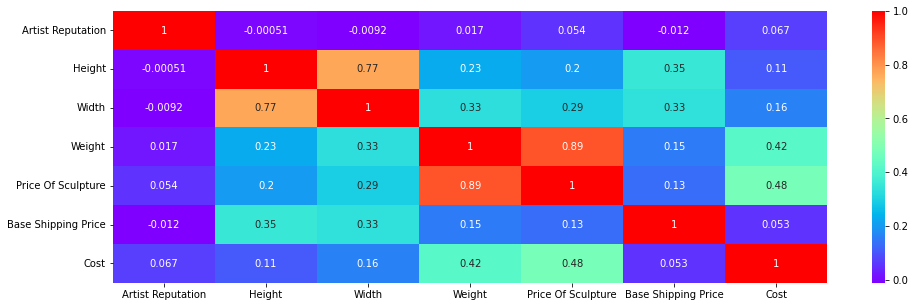

In [17]:
# Using seaborn
fig=plt.figure(figsize=(16,5))
sns.heatmap(train_data.corr(),annot=True,cmap='rainbow')
plt.show()

#  Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [18]:
# Import necessary libraries for performing Chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Helper function for performing chi-square test
def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    
    #Observed Values
    observed_values = contingency_table.values
    
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows =len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f =(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(0-e)**2./e for o,e in zip(var_2,expected_values)])
    chi_square_statistic =chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value =chi2.ppf(q=1-0.05,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [19]:
# looping on whole dataset for performing chi-square test
for i in categorical_list:
    for j in categorical_list:
        if i==j:
            pass
        else:
            print('chi squre test on: %s %s'%(i,j))
            perform_chi_square_test(i,j)
            print()
            print('-----'*15,'\n')

chi squre test on: Customer Id Artist Name
Degree of Freedom:  41905552
Significance level:  0.05
chi-square statistic:  0.0033846153846153852
critical_value: 41920611.509491675
p-value: 0.0
Retain H0,There is no relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables

--------------------------------------------------------------------------- 

chi squre test on: Customer Id Material
Degree of Freedom:  34410
Significance level:  0.05
chi-square statistic:  2.3598326359832638
critical_value: 34842.6378000954
p-value: 0.0
Retain H0,There is no relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables

--------------------------------------------------------------------------- 

chi squre test on: Customer Id International
Degree of Freedom:  6499
Significance level:  0.05
chi-square statistic:  13.0
critical_value: 6687.657867435159
p-value: 0.0
Retain H0,There is no relationship

# From above chi-square test:

- correlated variables:

  1. Customer Information and Transport 
  2. Customer Information and Express Shipment
  3. Fragile and Material 
  4. Transport and Express Shipment
  5. Transport and International 


# Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [20]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
train_for_vif=train_data.drop(['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location','Cost'],axis=1)
target=train_data['Cost']
# numerical values column names
# 'Artist Reputation',
#  'Height',
#  'Width',
#  'Weight',
#  'Price Of Sculpture',
#  'Base Shipping Price'
names = ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']

# print names
print(names)

['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']


In [22]:
# droping rows with empty cells
train_for_vif.dropna(inplace=True)

In [23]:
import statsmodels.api as sm
# Calculating VIF for each feature.
for i in range(0, len(names)):
  y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  x = train_for_vif.loc[:,train_for_vif.columns!=names[i]]
  model = sm.OLS(y,x,missing='drop')
  results = model.fit()
  rsq = results.rsquared
  vif = (1/(1-rsq),2)
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of Artist Reputation columns is 0.61 keeping all other columns as features
Variance inflation Factor of Artist Reputation columns is (2.5491734624547457, 2) 

R Square value of Height columns is 0.9 keeping all other columns as features
Variance inflation Factor of Height columns is (10.467248106088196, 2) 

R Square value of Width columns is 0.9 keeping all other columns as features
Variance inflation Factor of Width columns is (10.363725579296409, 2) 

R Square value of Weight columns is 0.84 keeping all other columns as features
Variance inflation Factor of Weight columns is (6.093811583483622, 2) 

R Square value of Price Of Sculpture columns is 0.83 keeping all other columns as features
Variance inflation Factor of Price Of Sculpture columns is (6.010131243013071, 2) 

R Square value of Base Shipping Price columns is 0.68 keeping all other columns as features
Variance inflation Factor of Base Shipping Price columns is (3.1220149658461023, 2) 



# Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is above 2.5

1. There is high colinearity between height and all other variables.
2. There is high colinearity between Width and all other variables.
3. There is high colinearity between Price Of Sculpture and all other variables.

 # ANOVA TEST


#  Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

# Homogeneity of variance Assumption Check

# Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

Columns to perform anova test with:
1. Artist Name with all numerical columns
2. Material with all numerical columns
3. International with all numerical columns
4. Express Shipment with all numerical columns
5. Installation Included with all numerical columns
6. Transport with all numerical columns
7. Fragile with all numerical columns
8. Customer Information with all numerical columns
9. Remote Location with all numerical columns
10. Scheduled Date with all numerical columns
11. Delivery Date with all numerical columns
12. Customer Location with all numerical columns

In [24]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data,columns=['Source of Variation','SS','df','MS','F','P-value','F crit'])
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count()*(train_anova.groupby(x).mean()-x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count()-1)*train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum()+SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique()-1
  anova_table['df']['Within Groups'] = train_anova.shape[0]-train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0]-1

  # calculate MS
  anova_table['MS'] = anova_table['SS']/anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1-stats.f.cdf(F,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two_tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = 1-stats.f.ppf(1-alpha,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

#  Anova test between Artist Name and all numerical columns

In [25]:
# perform_anova_test Artist Name and Artist Reputation
perform_anova_test('Artist Name', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Height
perform_anova_test('Artist Name', 'Height')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Width
perform_anova_test('Artist Name', 'Width')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Weight
perform_anova_test('Artist Name', 'Weight')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Price Of Sculptureprint

perform_anova_test('Artist Name', 'Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Base Shipping Price
perform_anova_test('Artist Name', 'Base Shipping Price')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Artist Name and Cost

perform_anova_test('Artist Name', 'Cost')



            Artist Name  Artist Reputation
0         Aaron Radford                  1
1         Aaron Schmitt                  1
2         Abby Gonzales                  1
3         Abby Phillips                  1
4              Abe Cook                  0
...                 ...                ...
6444   Zachary Paquette                  1
6445      Zachary Woods                  0
6446  Zachary Zimmerman                  1
6447      Zita Matchett                  0
6448    Zoila Ingwersen                  1

[6449 rows x 2 columns]
Artist Reputation    92.0
dtype: float64
                             SS    df        MS         F   P-value    F crit
Source of Variation                                                          
Between Groups        403.61977  6448  0.062596  1.283459  0.127308 -0.434076
Within Groups          2.487342    51  0.048771                              
Total                406.107111  6499  0.062488                              
Approach 1: The p-value appr

# Anova test between Material and all numerical columns

In [26]:
# perform_anova_test Material and Artist Reputation
perform_anova_test('Material', 'Artist Reputation')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Height


perform_anova_test('Material', 'Height')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Width


perform_anova_test('Material', 'Width')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Weight

perform_anova_test('Material', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Price Of Sculpture

perform_anova_test('Material', 'Price Of Sculpture')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Base Shipping Price

perform_anova_test('Material', 'Base Shipping Price')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Material and Cost

perform_anova_test('Material', 'Cost')



    Material  Artist Reputation
0  Aluminium                761
1      Brass                764
2     Bronze                713
3       Clay                728
4     Marble                742
5      Stone                690
6       Wood                728
Artist Reputation    1.03544
dtype: float64
                             SS    df        MS         F  P-value    F crit
Source of Variation                                                         
Between Groups         0.310363     6  0.051727  0.928526  0.47298 -1.099987
Within Groups        361.718481  6493  0.055709                             
Total                362.028844  6499  0.055705                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.9285255947268538  and p value is: 0.4729795187779856
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.9285255947268538  and critical value 

#  Anova test between International and all numerical columns

In [27]:
# perform_anova_test International and Artist Reputation

perform_anova_test('International', 'Artist Reputation')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Height

perform_anova_test('International', 'Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Width

perform_anova_test('International', 'Width')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Weight

perform_anova_test('International', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Price Of Sculpture

perform_anova_test('International', 'Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Base Shipping Price


perform_anova_test('International', 'Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test International and Cost


perform_anova_test('International', 'Cost')



  International  Artist Reputation
0            No               3810
1           Yes               1940
Artist Reputation    1.017074
dtype: float64
                             SS    df        MS         F   P-value   F crit
Source of Variation                                                         
Between Groups         0.087901     1  0.087901  1.406786  0.235634 -2.84289
Within Groups         406.01921  6498  0.062484                             
Total                406.107111  6499  0.062488                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.4067858891827367  and p value is: 0.2356340540107178
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.4067858891827367  and critical value is: -2.842890292166412
Null Hypothesis is rejected.

---------------------------------------------------------------------------------

  Internationa

# Anova test between Fragile and all numerical columns

In [28]:
# perform_anova_test Fragile and Height


perform_anova_test('Fragile', 'Height')



print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Width


perform_anova_test('Fragile', 'Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Weight


perform_anova_test('Fragile', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Price Of Sculpture

perform_anova_test('Fragile', 'Price Of Sculpture')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Base Shipping Price



perform_anova_test('Fragile', 'Base Shipping Price')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Fragile and Cost


perform_anova_test('Fragile', 'Cost')



  Fragile  Height
0      No    5144
1     Yes     981
Height    1.213999
dtype: float64
                                SS    df           MS         F P-value  \
Source of Variation                                                       
Between Groups         6682.256186     1  6682.256186  49.88059     0.0   
Within Groups        870504.948059  6498   133.965058                     
Total                877187.204245  6499   134.972643                     

                      F crit  
Source of Variation           
Between Groups      -2.84289  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 49.88059033332636  and p value is: 1.8040013927134169e-12
Null Hypothesis is rejected.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 49.88059033332636  and critical value is: -2.842890292166412
Null Hypothesis is rejected.

--------------------

#  Anova test between Customer Information and all numerical columns

In [29]:
# perform_anova_test Customer Information and Artist Reputation


perform_anova_test('Customer Information', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Height

perform_anova_test('Customer Information', 'Height')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Width

perform_anova_test('Customer Information', 'Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Weight


perform_anova_test('Customer Information', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Price Of Sculpture


perform_anova_test('Customer Information', 'Price Of Sculpture')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Base Shipping Price

perform_anova_test('Customer Information', 'Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Information and Cost


perform_anova_test('Customer Information', 'Cost')



  Customer Information  Artist Reputation
0              Wealthy               1513
1        Working Class               4237
Artist Reputation    1.017857
dtype: float64
                             SS    df        MS         F  P-value   F crit
Source of Variation                                                        
Between Groups         0.039193     1  0.039193  0.627181  0.42842 -2.84289
Within Groups        406.067918  6498  0.062491                            
Total                406.107111  6499  0.062488                            
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.6271808540131343  and p value is: 0.4284201933217928
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.6271808540131343  and critical value is: -2.842890292166412
Null Hypothesis is rejected.

---------------------------------------------------------------------------------

#  Anova test between Remote Locaation and all numerical columns

In [30]:
# perform_anova_test Remote Location and Artist Reputation

perform_anova_test('Remote Location', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Height

perform_anova_test('Remote Location', 'Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Width

perform_anova_test('Remote Location', 'Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Weight

perform_anova_test('Remote Location', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Price Of Sculpture


perform_anova_test('Remote Location', 'Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Base Shipping Price


perform_anova_test('Remote Location', 'Base Shipping Price')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Remote Location and Cost


perform_anova_test('Remote Location', 'Cost')


  Remote Location  Artist Reputation
0              No               4093
1             Yes               1020
Artist Reputation    1.005561
dtype: float64
                             SS    df        MS         F  P-value   F crit
Source of Variation                                                        
Between Groups         0.034795     1  0.034795  0.627859  0.42817 -2.84289
Within Groups        360.107766  6498  0.055418                            
Total                360.142561  6499  0.055415                            
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.627859469167882  and p value is: 0.4281704899354626
Failed to reject the null hypothesis.
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.627859469167882  and critical value is: -2.842890292166412
Null Hypothesis is rejected.

---------------------------------------------------------------------------------

  Remote Locati

### Anova test between Scheduled Date and all numerical columns 

In [31]:
# perform_anova_test Scheduled Date and Artist Reputation

perform_anova_test('Scheduled Date', 'Artist Reputation')




print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Height


perform_anova_test('Scheduled Date', 'Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Width


perform_anova_test('Scheduled Date', 'Width')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Weight

perform_anova_test('Scheduled Date', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Price Of Sculpture


perform_anova_test('Scheduled Date', 'Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Base Shipping Price

perform_anova_test('Scheduled Date', 'Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Scheduled Date and Cost

perform_anova_test('Scheduled Date', 'Cost')



     Scheduled Date  Artist Reputation
0          01/01/15                  1
1          01/01/16                  1
2          01/01/17                  2
3          01/01/18                  3
4          01/01/19                  3
...             ...                ...
1655       12/30/18                  5
1656       12/31/15                  0
1657       12/31/16                  3
1658       12/31/17                  3
1659       12/31/18                  4

[1660 rows x 2 columns]
Artist Reputation    inf
dtype: float64
                             SS    df        MS         F   P-value   F crit
Source of Variation                                                         
Between Groups       115.542496  1659  0.069646  1.160107  0.000092 -0.06777
Within Groups        290.564616  4840  0.060034                             
Total                406.107111  6499  0.062488                             
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-scor

### Anova test between Delivery Date and all numerical columns

In [32]:
# perform_anova_test Delivery Date and Artist Reputation


perform_anova_test('Delivery Date', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Height


perform_anova_test('Delivery Date', 'Height')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Width

perform_anova_test('Delivery Date', 'Width')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Weight

perform_anova_test('Delivery Date', 'Weight')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Price Of Sculpture

perform_anova_test('Delivery Date', 'Price Of Sculpture')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Base Shipping Price


perform_anova_test('Delivery Date', 'Base Shipping Price')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Delivery Date and Cost

perform_anova_test('Delivery Date', 'Cost')



     Delivery Date  Artist Reputation
0         01/01/15                  0
1         01/01/16                  2
2         01/01/17                  1
3         01/01/18                  6
4         01/01/19                  1
...            ...                ...
1659      12/30/18                  4
1660      12/31/15                  3
1661      12/31/16                  3
1662      12/31/17                  4
1663      12/31/18                  2

[1664 rows x 2 columns]
Artist Reputation    inf
dtype: float64
                             SS    df        MS         F   P-value    F crit
Source of Variation                                                          
Between Groups        109.98591  1663  0.066137  1.080094  0.026507 -0.067717
Within Groups        296.121201  4836  0.061233                              
Total                406.107111  6499  0.062488                              
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1

### Anova test between Customer Location and all numerical columns

In [33]:
# perform_anova_test Customer Location and Artist Reputation

perform_anova_test('Customer Location', 'Artist Reputation')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Height

perform_anova_test('Customer Location', 'Height')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Width


perform_anova_test('Customer Location', 'Width')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Weight


perform_anova_test('Customer Location', 'Artist Reputation')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Price Of Sculpture


perform_anova_test('Customer Location', 'Price Of Sculpture')

print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Base Shipping Price

perform_anova_test('Customer Location', 'Base Shipping Price')


print("\n---------------------------------------------------------------------------------\n")
# perform_anova_test Customer Location and Cost

perform_anova_test('Customer Location', 'Cost')



             Customer Location  Artist Reputation
0                 APO AA 01054                  1
1                 APO AA 06113                  1
2                 APO AA 07266                  1
3                 APO AA 07296                  1
4                 APO AA 08095                  1
...                        ...                ...
6495      Zacharyton, OH 03996                  1
6496   Zamorachester, CA 54819                  1
6497      Zavalatown, SD 31777                  1
6498   Zimmermanport, CT 07279                  1
6499  Zimmermanville, WV 96908                  1

[6500 rows x 2 columns]
Artist Reputation   NaN
dtype: float64
                             SS    df        MS    F P-value F crit
Source of Variation                                                
Between Groups       406.107111  6499  0.062488  NaN     NaN    NaN
Within Groups               0.0     0       NaN                    
Total                406.107111  6499  0.062488                 

# Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


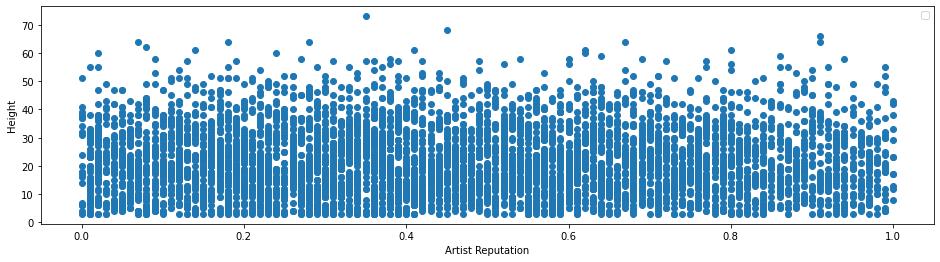

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


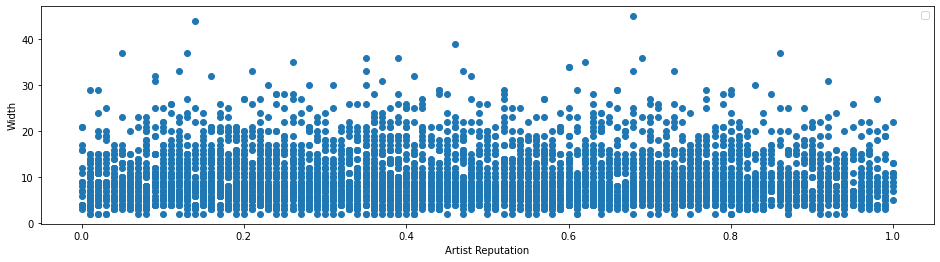

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


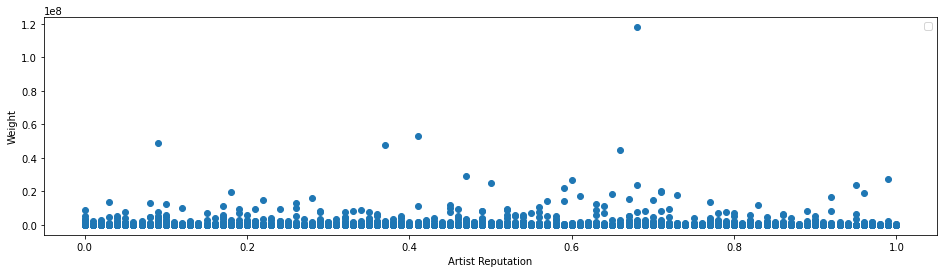

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


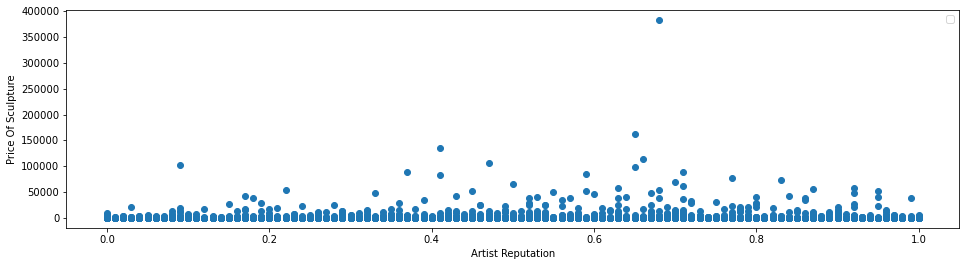

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


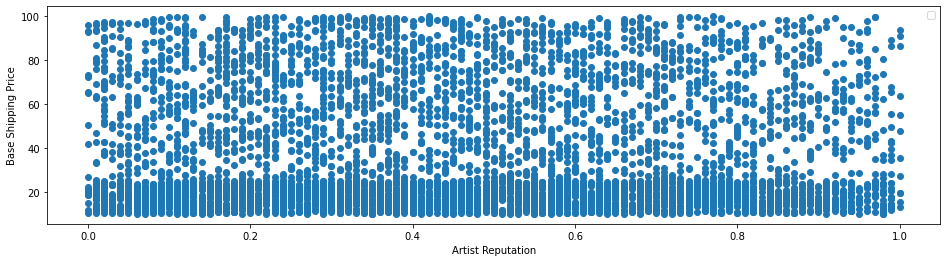

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


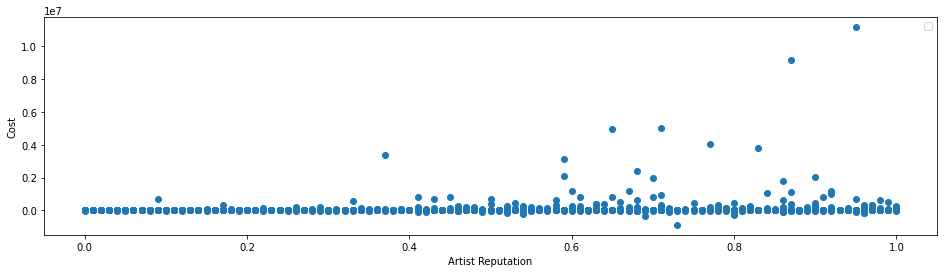

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


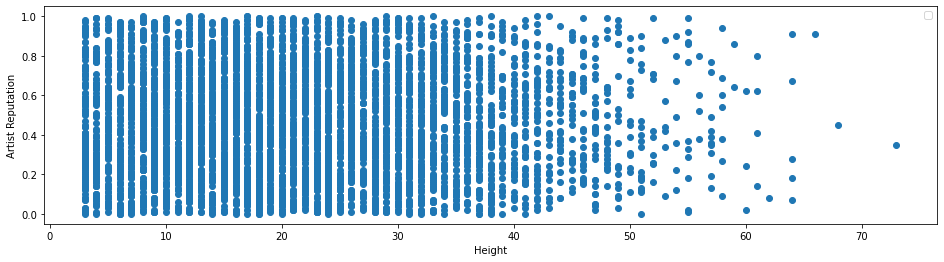

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


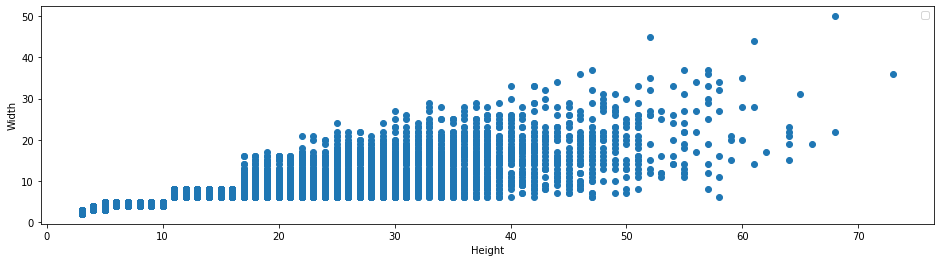

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


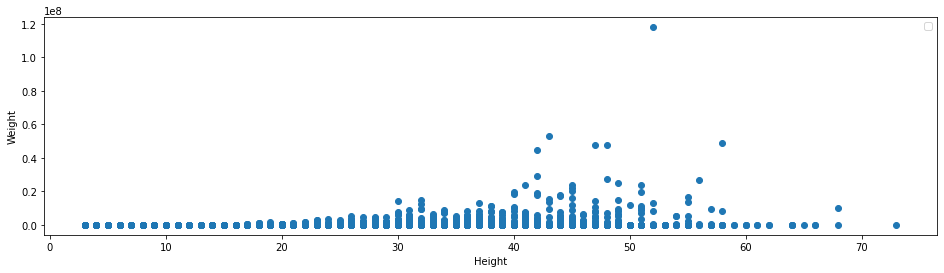

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


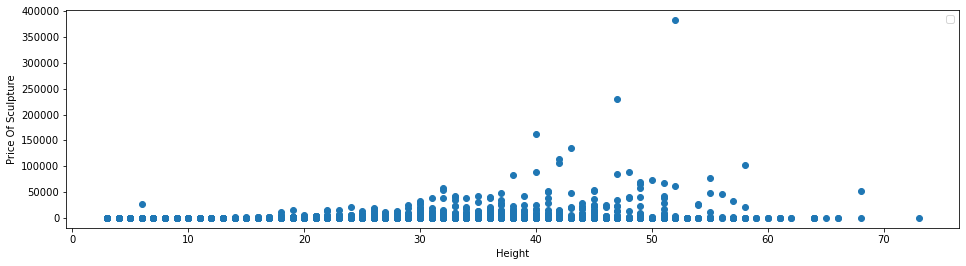

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


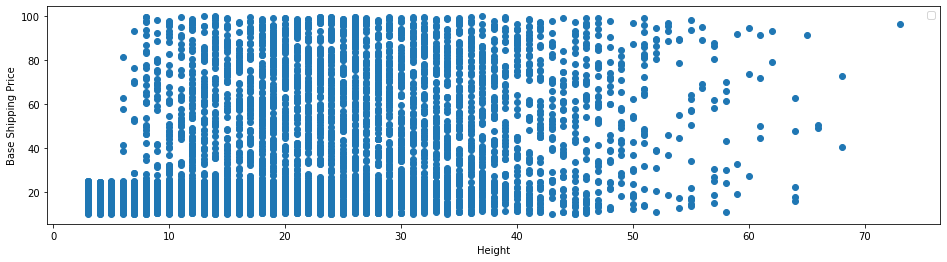

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


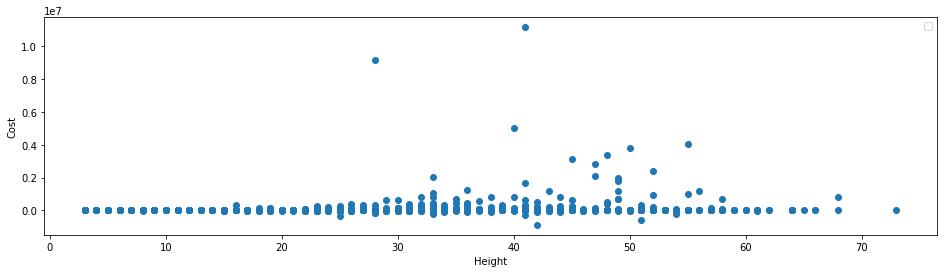

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


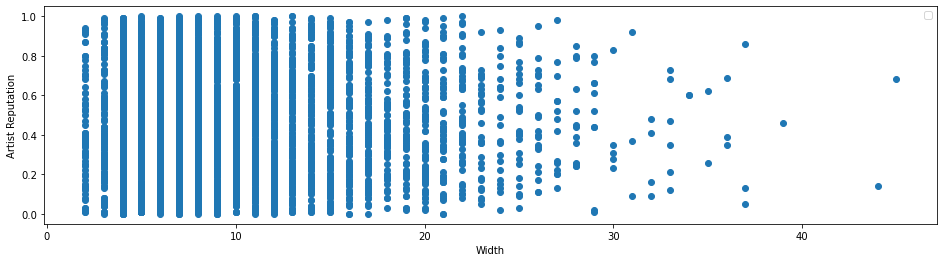

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


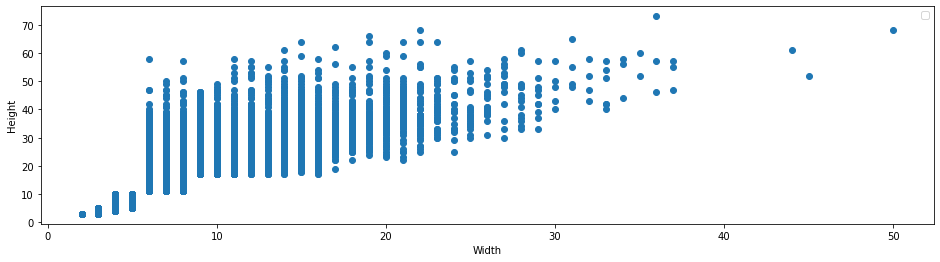

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


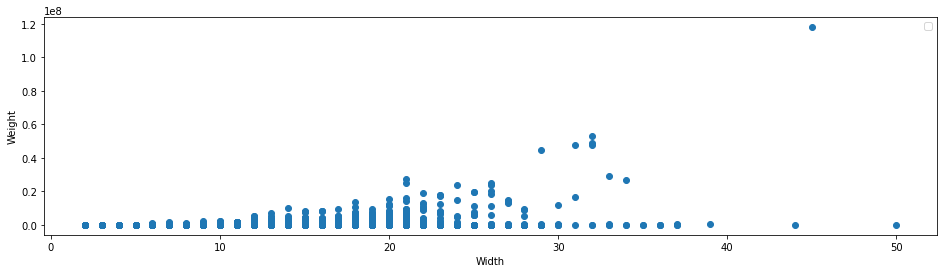

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


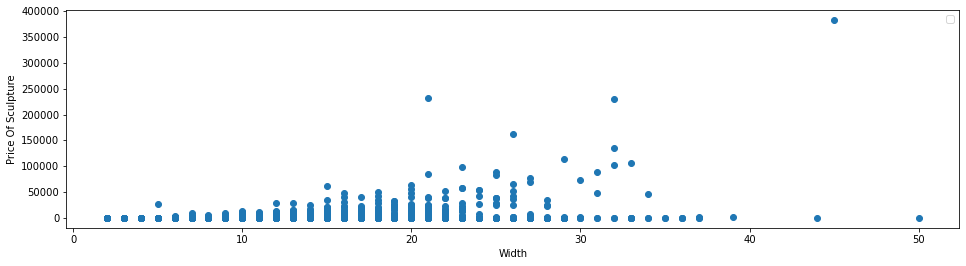

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


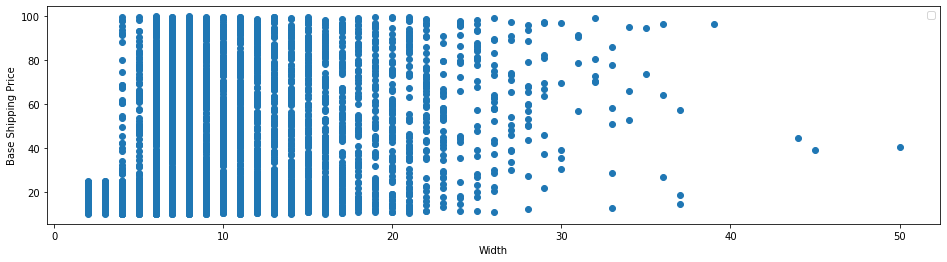

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


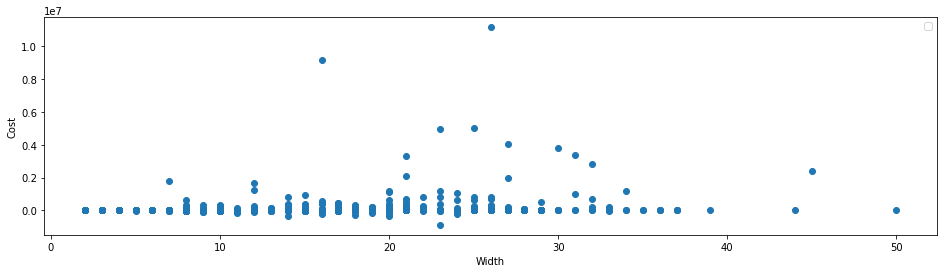

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


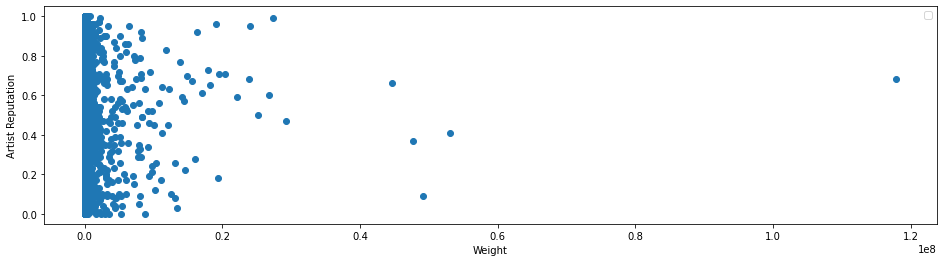

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


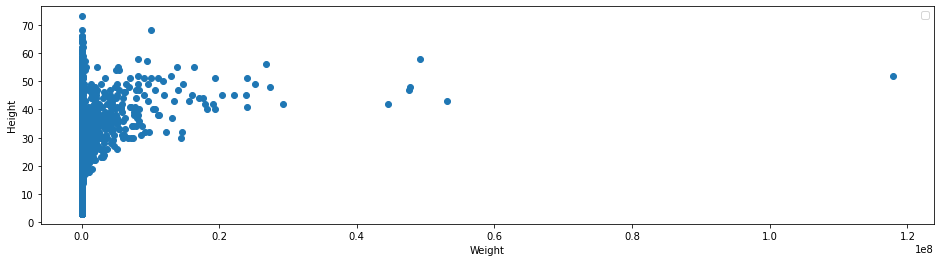

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


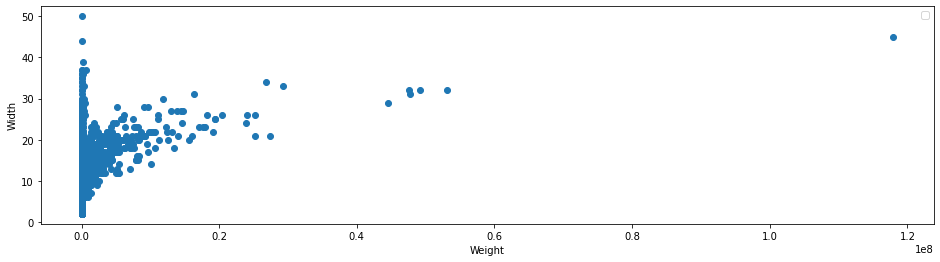

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


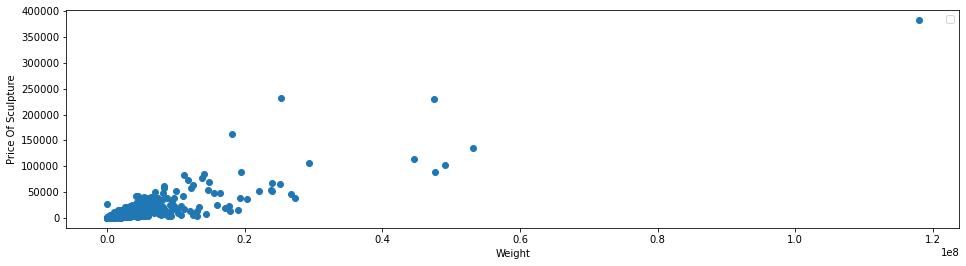

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


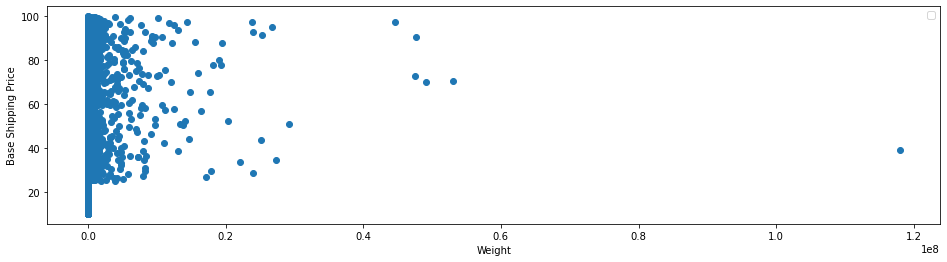

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


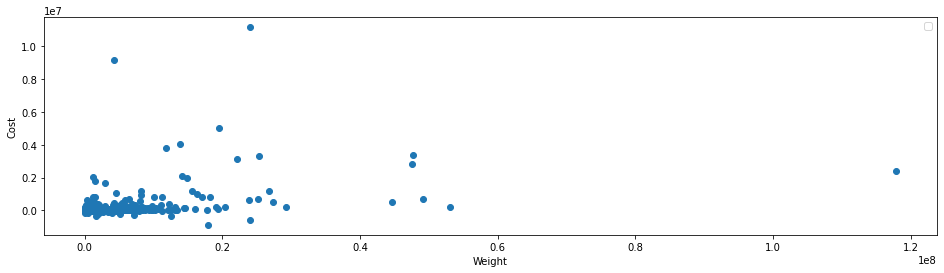

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


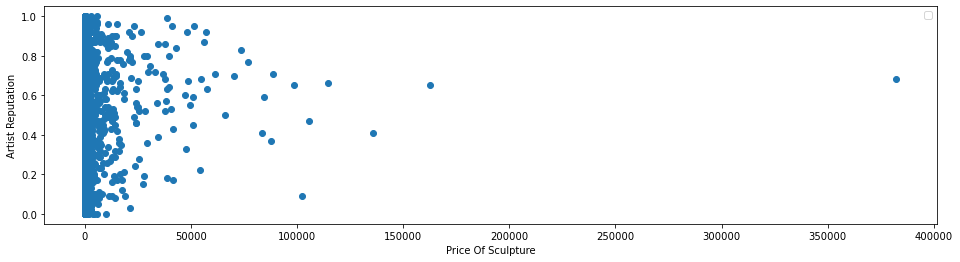

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


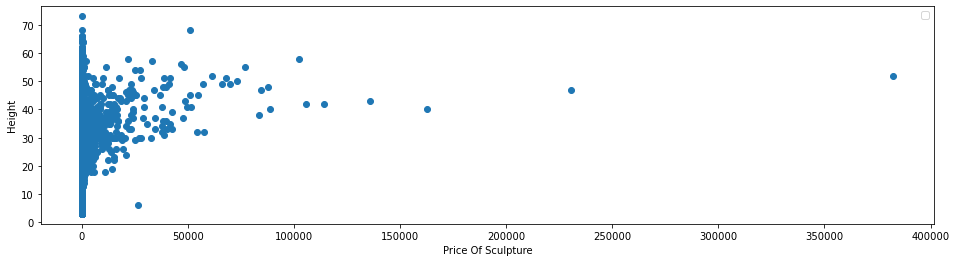

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


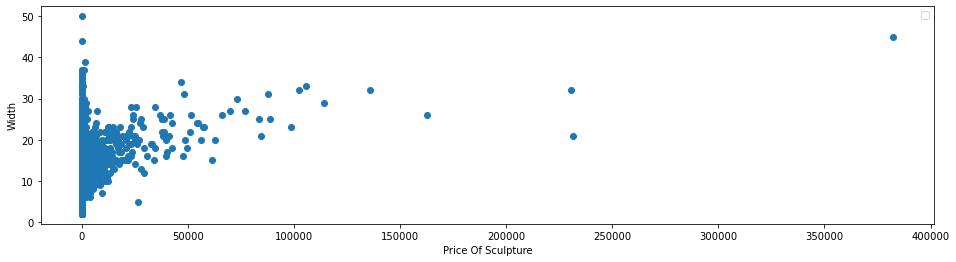

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


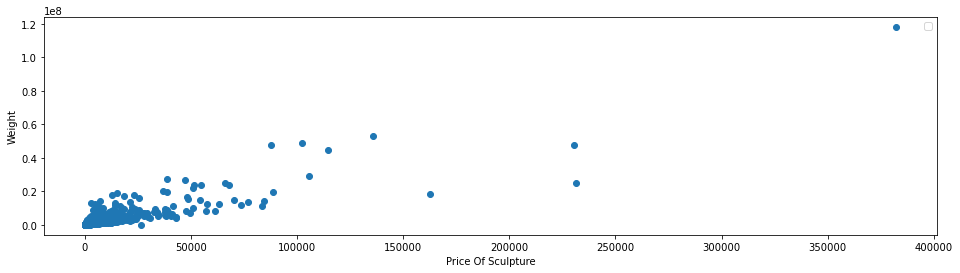

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


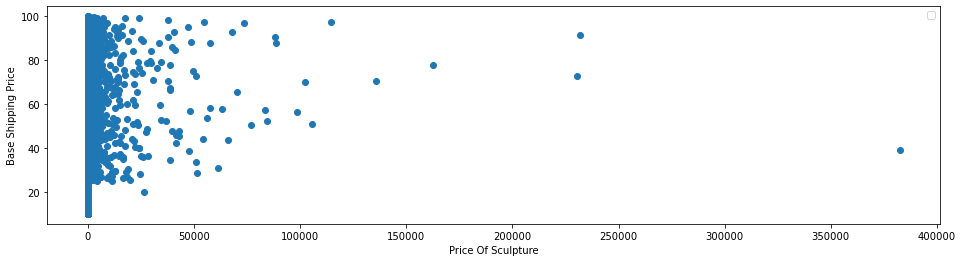

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


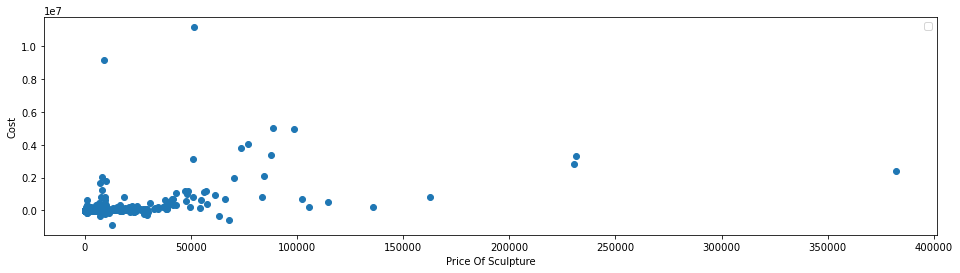

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


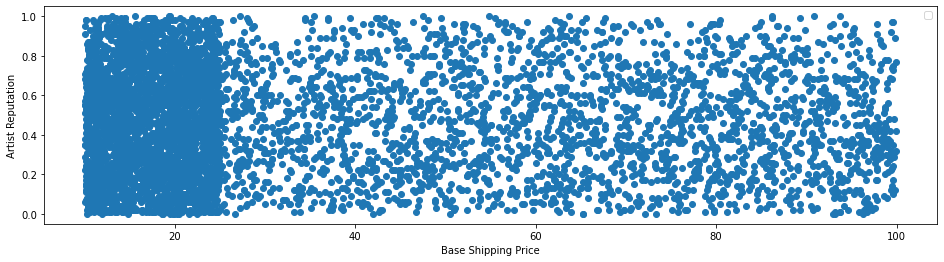

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


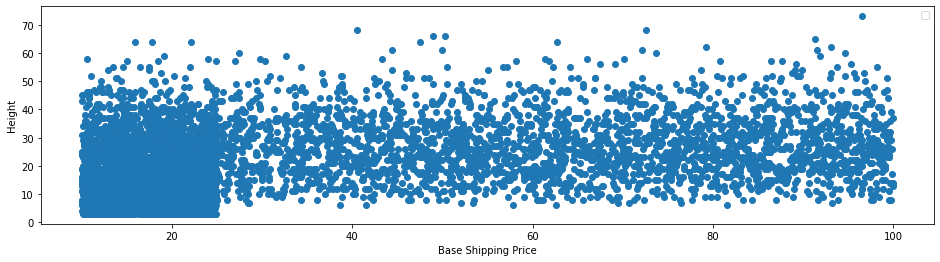

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


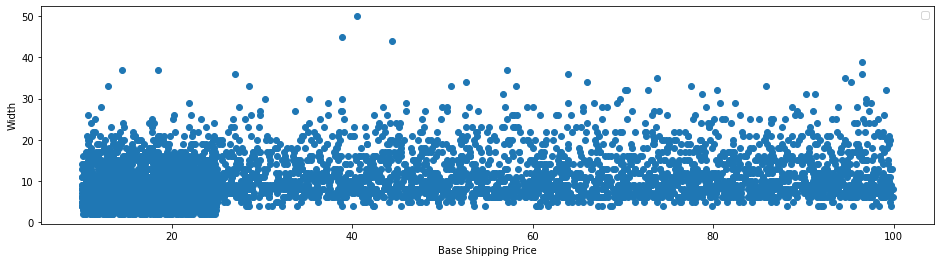

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


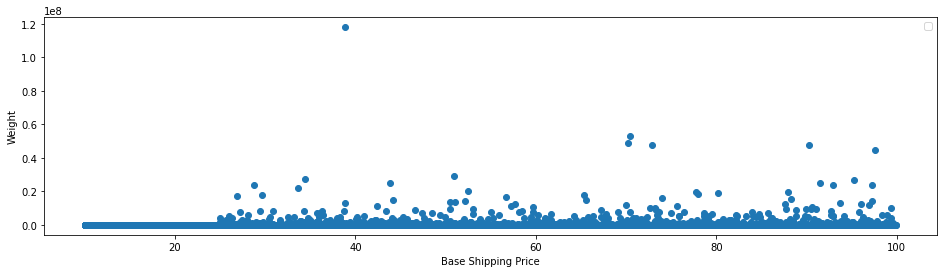

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


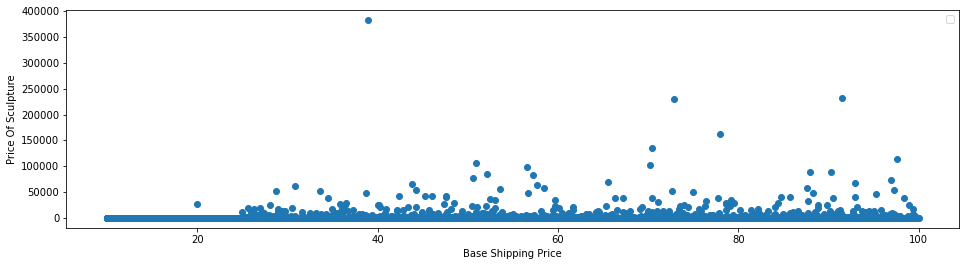

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


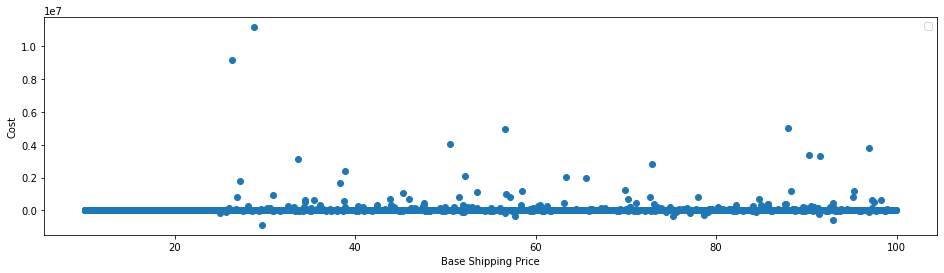

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


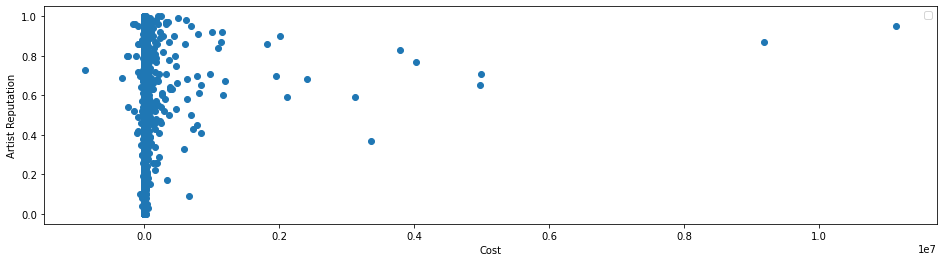

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


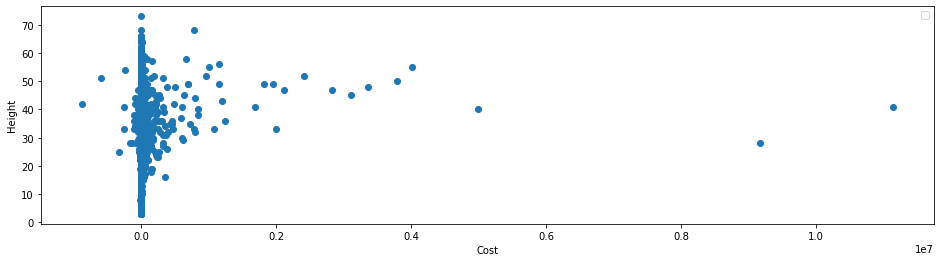

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


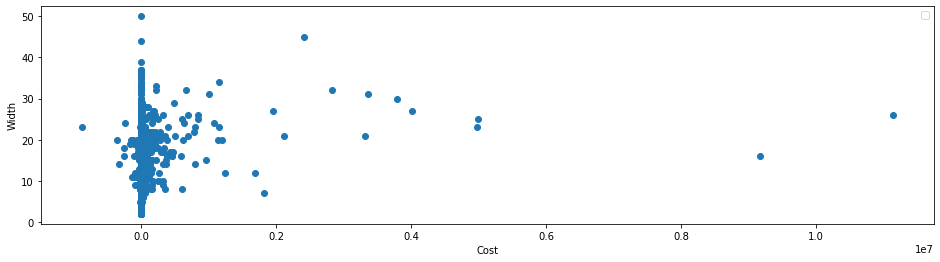

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


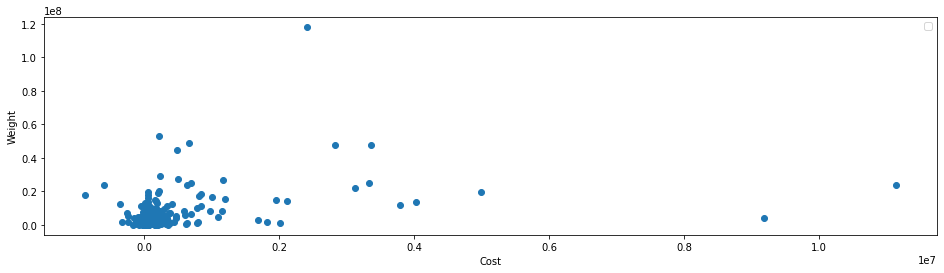

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


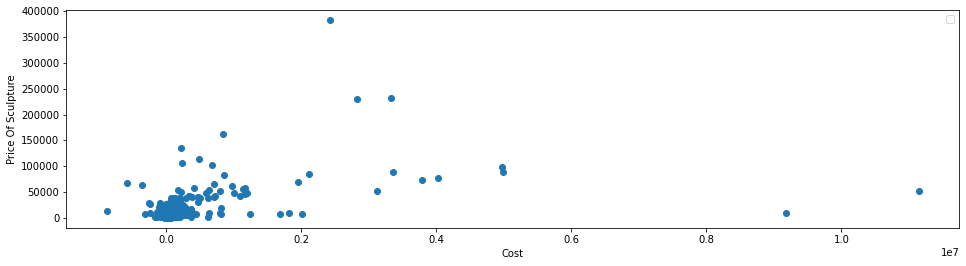

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


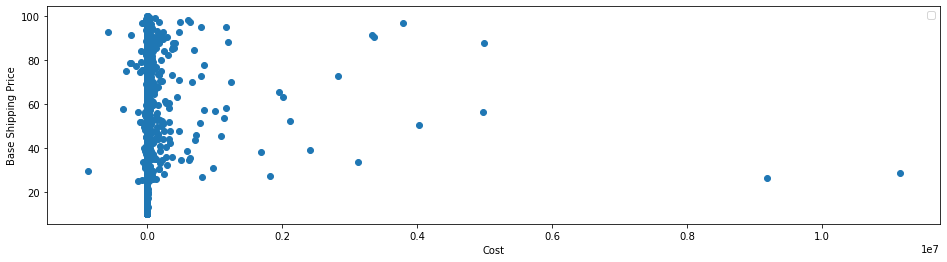

In [34]:
# Using matplotlib 
# create function for ploting scatterplot between two columns of dataset

def plot_scatter(x, y):
  # code below
   plt.figure(figsize=(16,4))
   plt.scatter(x=train_data[x],y=train_data[y])
   plt.xlabel(x)
   plt.ylabel(y)
   plt.legend()
   plt.show()
# Loop through the different columns 
for i in numerical_list:
    for j in numerical_list:
        if i==j:
            pass
        else:
            plot_scatter(i,j)

From above scatter plot

1. Increase in value on Width axis results in increase of values on Height axis. That is they are positively correlated.

2. Increase in value on Weight axis results in increase of values on Price Of Sculpture and Cost axis. Weight and Price Of Sculpture are strongly correlated , Weight and Cost are weakly correlated.

# Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<AxesSubplot:title={'center':'Artist Reputation'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Price Of Sculpture'}>,
        <AxesSubplot:title={'center':'Base Shipping Price'}>],
       [<AxesSubplot:title={'center':'Cost'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

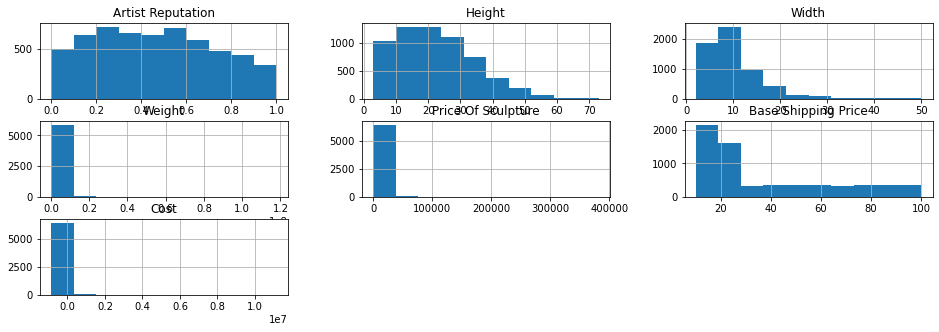

In [35]:
train_data.hist(figsize=(16,5))

From the above histogram

1. Artist Reputation data distribution is symmetric.

2. Height data distribution is skewed right.

3. Width data distribution is skewed right.

4. Weight data distribution is skewed right.

5. Price Of Sculpture data distribution is skewed right.

6. Base Shipping Price data distribution is skewed right.

3. Cost data distribution is skewed right.


In [36]:
# train columns
train_data.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

<AxesSubplot:xlabel='Artist Reputation'>

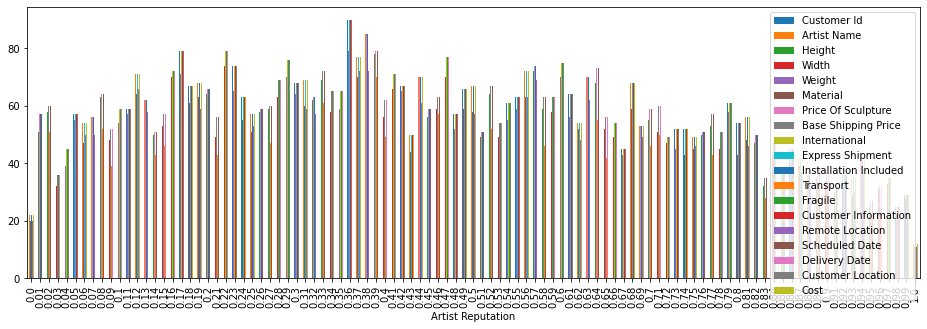

In [37]:
# group data by Artist Reputation and plot count plot
train_data.groupby('Artist Reputation').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each value of Artist Reputation is distributed unequally.
2. But for overall data distribution of Artist Reputation is symmetrical

<AxesSubplot:xlabel='Height'>

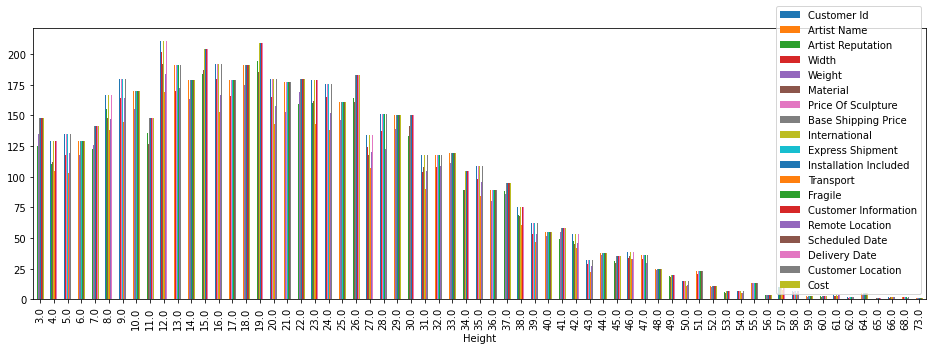

In [38]:
# group data by Height and plot count plot
train_data.groupby('Height').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each value of Height is distributed unequally.
2. But for overall data distribution of Height is skewed left.

<AxesSubplot:xlabel='Width'>

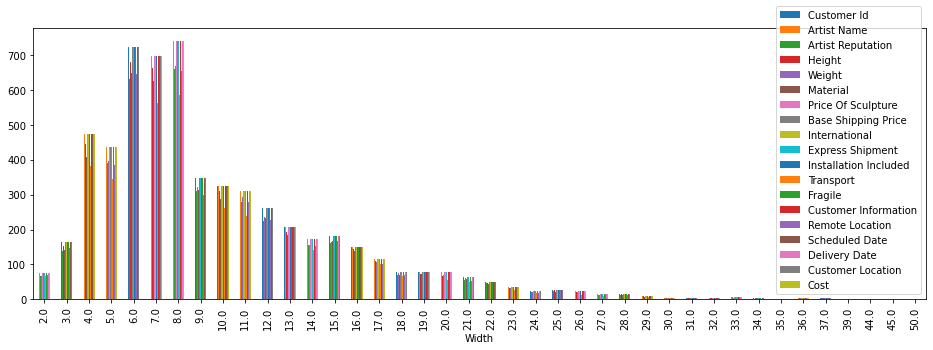

In [39]:
# group data by Width and plot count plot
train_data.groupby('Width').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each value of Width is distributed unequally.
2. But for overall data distribution of Width is skewed left.

<AxesSubplot:xlabel='Weight'>

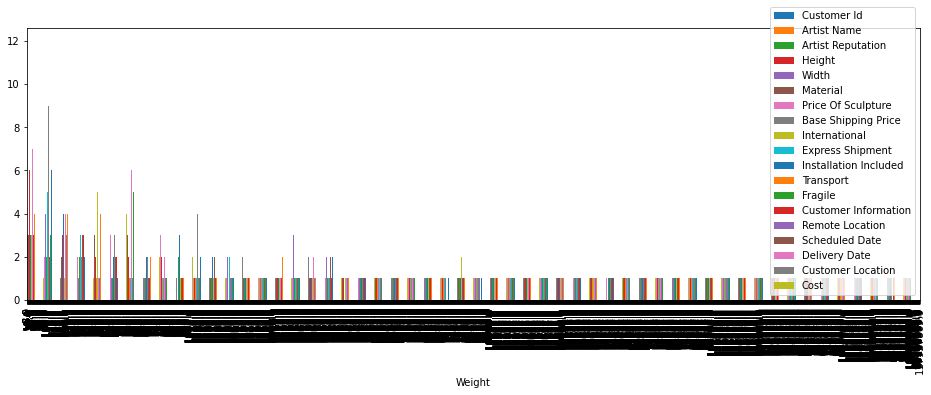

In [40]:
# group data by Weight and plot count plot
train_data.groupby('Weight').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each value of Weight is distributed unequally.
2. But for overall data distribution of Weight is skewed left.

<AxesSubplot:xlabel='Price Of Sculpture'>

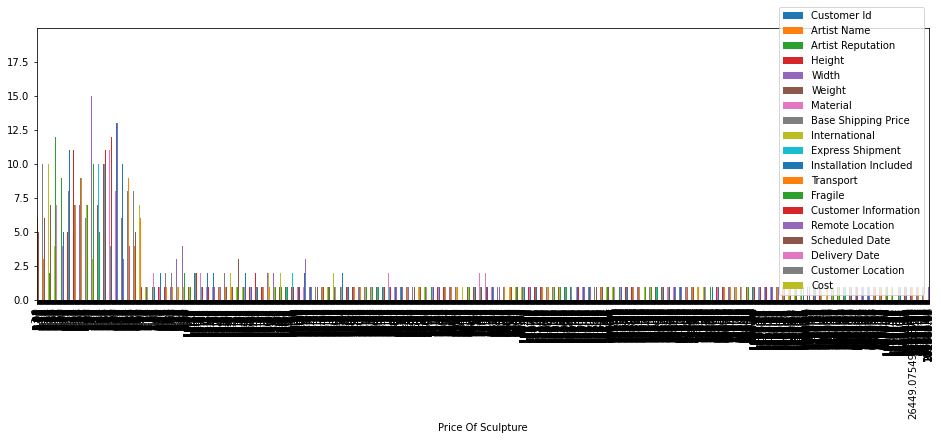

In [41]:
# group data by Price Of Sculpture and plot count plot
train_data.groupby('Price Of Sculpture').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each value of Price Of Sculpture is distributed unequally.
2. But for overall data distribution of Price Of Sculpture is skewed left.

<AxesSubplot:xlabel='Base Shipping Price'>

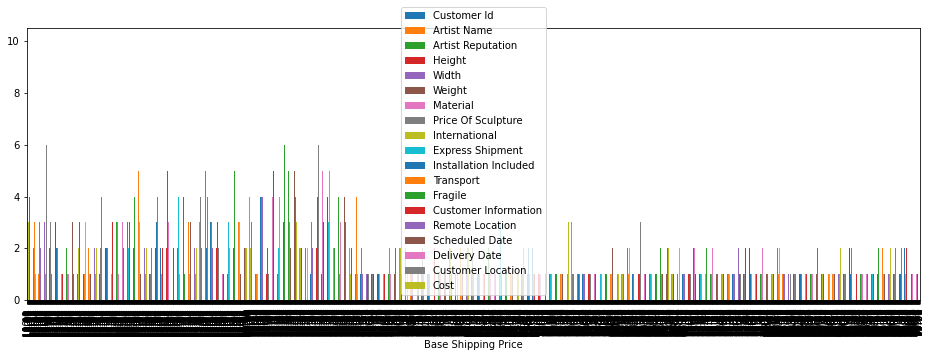

In [42]:
# group data by Base Shipping Price and plot count plot
train_data.groupby('Base Shipping Price').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each Base Shipping Price value is distributed unequally.
2. Base Shipping Price is skewed left.

<AxesSubplot:xlabel='International'>

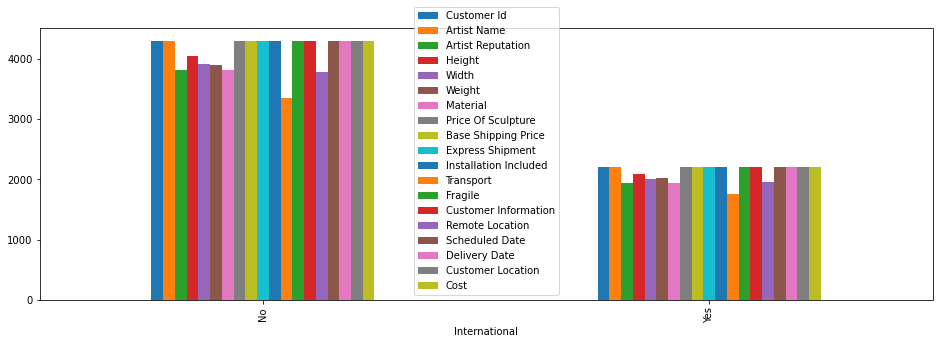

In [43]:
# group data by International and plot count plot
train_data.groupby('International').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. Number of varibales having "No" as value of international is almost double the number of varibales having "Yes" value.

<AxesSubplot:xlabel='Express Shipment'>

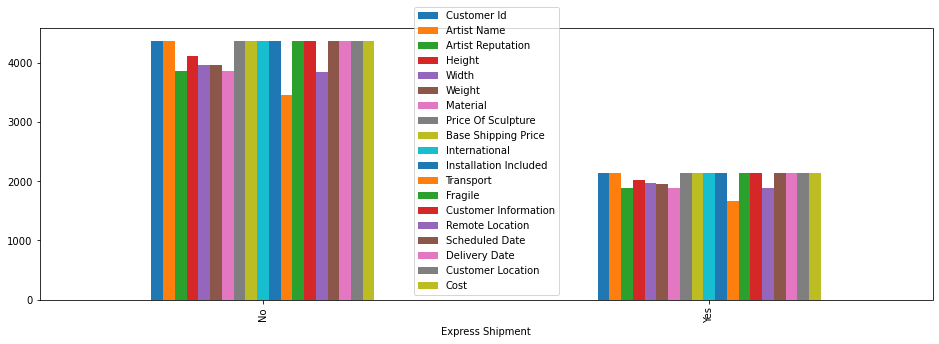

In [44]:
# group data by Express Shipment and plot count plot
train_data.groupby('Express Shipment').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. Number of variables having "No" as value Express Shipment is almost double the number of variables having "Yes" value.

<AxesSubplot:xlabel='Installation Included'>

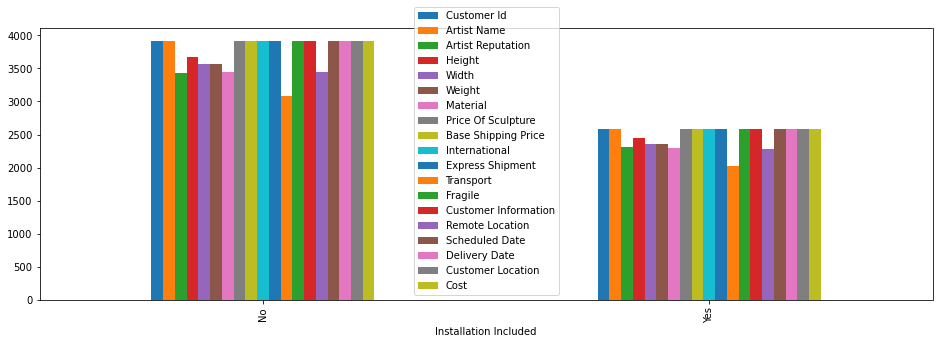

In [45]:
# group data by Installation Included and plot count plot
train_data.groupby('Installation Included').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. Number of variables having "No" as value international is almost double the number of variables having "Yes" value.

<AxesSubplot:xlabel='Transport'>

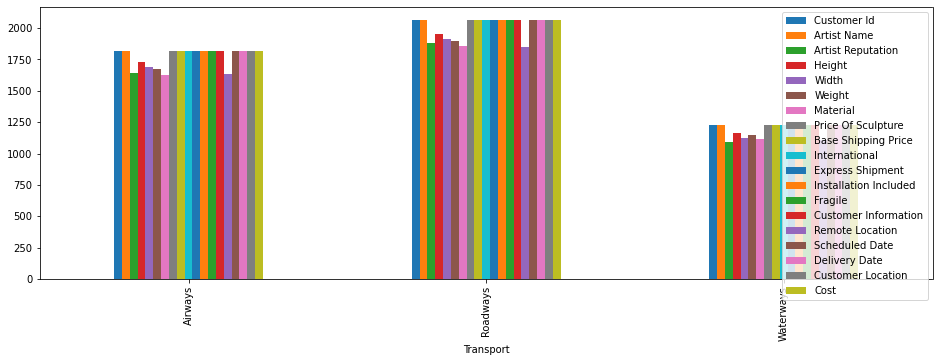

In [46]:
# group data by Transport and plot count plot
train_data.groupby('Transport').count().plot(kind='bar',figsize=(16,5))

1. Number of variables having value as Roadways is greater than Number of variables having value Airways
2. Number of variables having value Waterways is half as compared to those of Airways and Roadways

<AxesSubplot:xlabel='Fragile'>

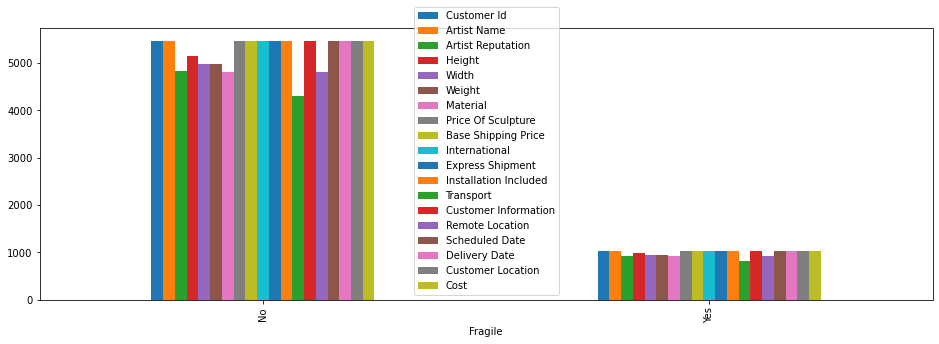

In [47]:
# group data by Fragile and plot count plot
train_data.groupby('Fragile').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. 10% of the Sculptures are Fragile

<AxesSubplot:xlabel='Customer Information'>

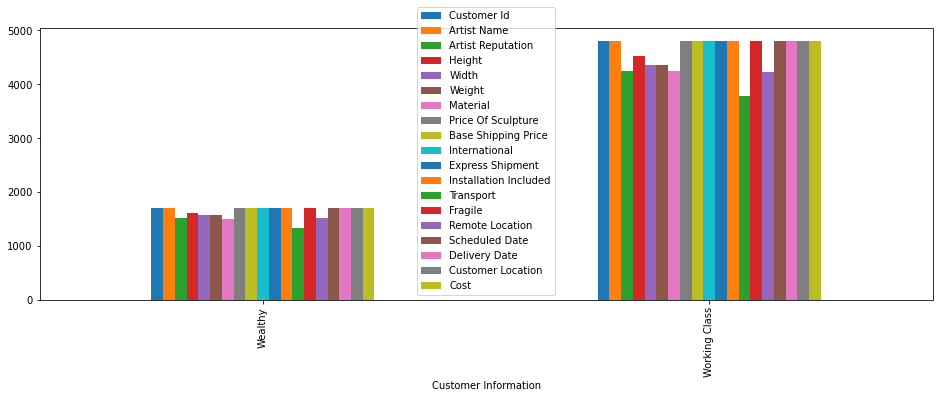

In [48]:
# group data by Customer Information and plot count plot
train_data.groupby('Customer Information').count().plot(kind='bar',figsize=(16,5))

from above graph

Most of the customers blongs to Working class.

<AxesSubplot:xlabel='Remote Location'>

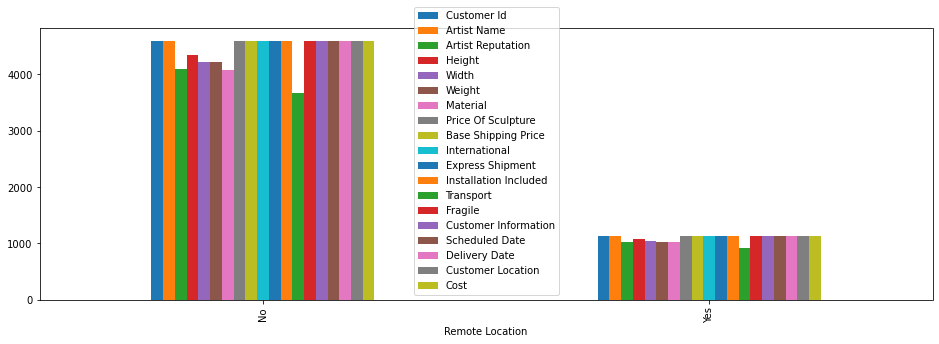

In [49]:
# group data by Remote Location and plot count plot
train_data.groupby('Remote Location').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. Number sample having remote location is double the number of sample which are not.

<AxesSubplot:xlabel='Scheduled Date'>

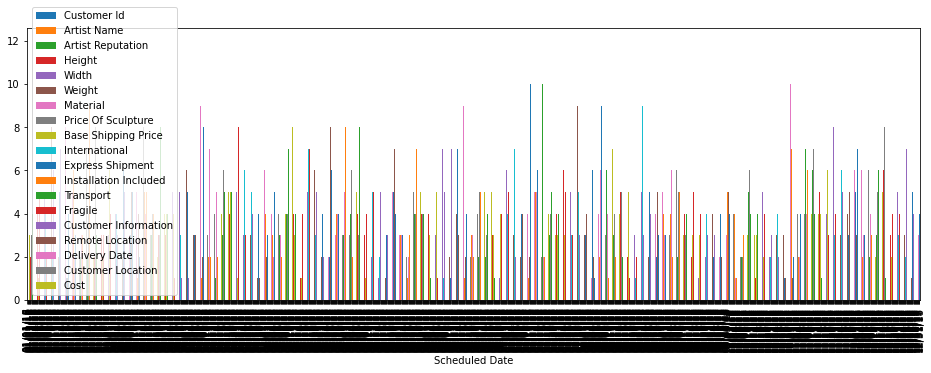

In [50]:
# group data by Scheduled Date and plot count plot
train_data.groupby('Scheduled Date').count().plot(kind='bar',figsize=(16,5))

from above graph:
1. All data for each Scheduled Date is distributed  unequally.

# Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

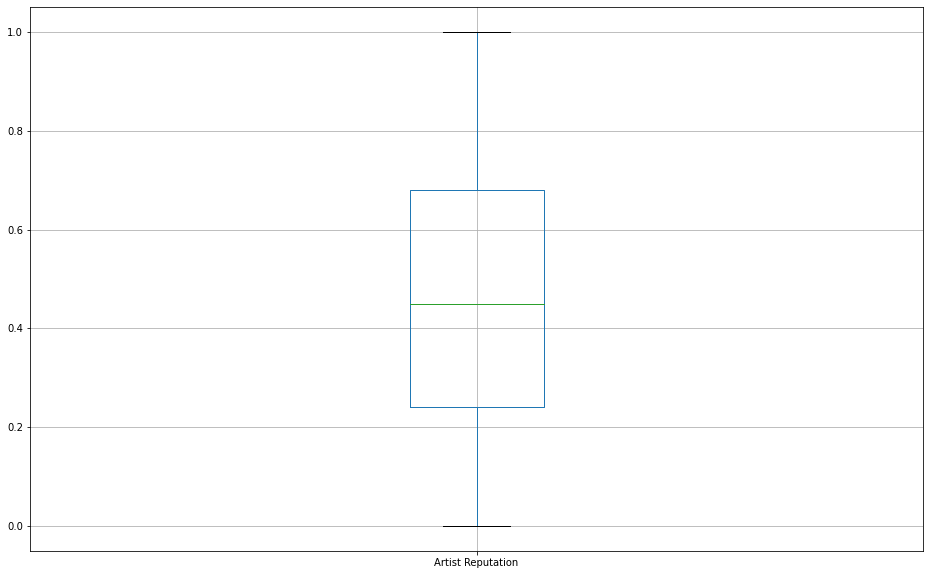

In [51]:
# box plot using pandas 
# box plot for Artist Reputation column
train_data.boxplot(column='Artist Reputation',figsize=(16,10))

from above box plot graph:

- Artist reputation
  1. 25% of Artist reputation have value between range 0 to 0.24.
  2. 25% of Artist reputation have value between range 0.24 to 0.45.
  3. 25% of Artist reputation have value between range 0.45 to 0.68.
  4. 25% of Artist reputation have value between range 0.68 to 1.


- The mean Artist Reputation is around 0.45

<AxesSubplot:>

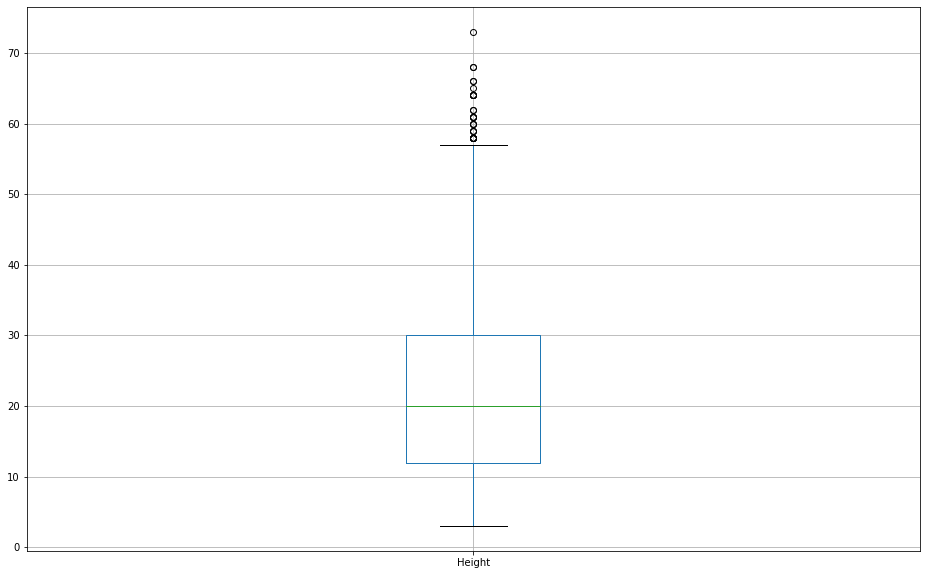

In [52]:
# box plot using pandas 
# box plot for Height column
train_data.boxplot(column='Height',figsize=(16,10))

from above box plot graph:

- Height
  1. 25% of Heigth have value between range 3 to 12.
  2. 25% of Artist reputation have value between range 12 to 20.
  3. 25% of Artist reputation have value between range 20 to 30.
  4. 25% of Artist reputation have value between range 30 to 73.


- The mean Height is around 20.

<AxesSubplot:>

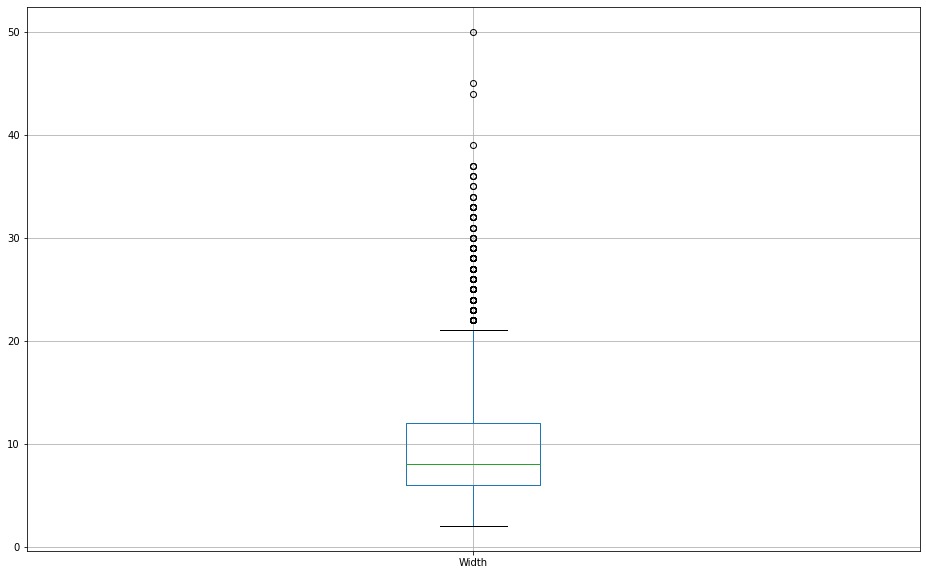

In [53]:
# box plot using pandas 
# box plot for Width column 
train_data.boxplot(column='Width',figsize=(16,10))

from above box plot graph:

- Width
  1. less than 25% of Width have value between range 2 to 6.
  2. less 50% of Width have value between range 2 to 8.
  3. less than 75% of Width have value between range 2 to 12.
  4. More than 25% Width have value between range 12 to 22.
  5. very few values of width are in range between 22 to 50. that is these are outliers


- The mean Width is around 10

<AxesSubplot:>

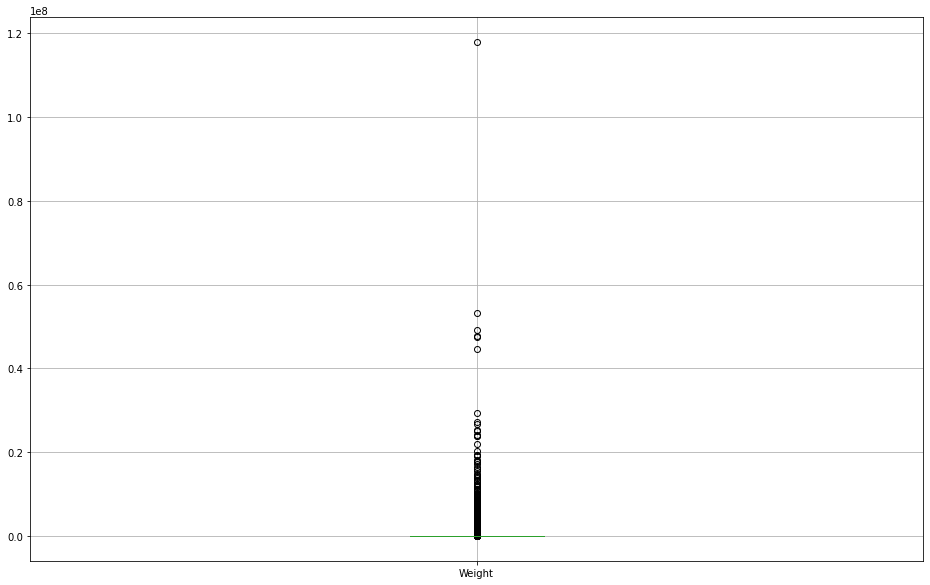

In [54]:
# box plot using pandas 
# box plot for Weight column 
train_data.boxplot(column='Weight',figsize=(16,10))

from above box plot graph:

- Height
  1. less than Height of Width have value between range 2 to 6.
  2. less 50% of Height have value between range 2 to 8.
  3. less than 75% of Height have value between range 2 to 12.
  4. More than 25% Height have value between range 12 to 22.
  5. very few values of Height are in range between 22 to 50. that is these are outliers


- The mean Height is around 10

<AxesSubplot:>

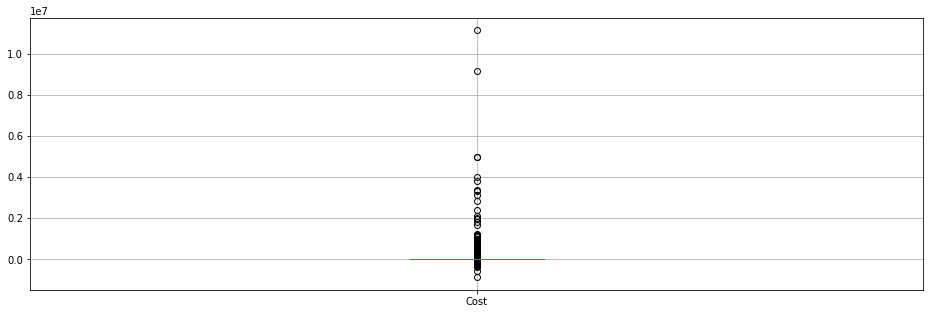

In [55]:
# box plot using pandas 
# box plot for Cost column 
train_data.boxplot(column='Cost',figsize=(16,5))

from above box plot graph:

- Cost
  1. Most of the Cost value is around 0
  2. very few values are above 0.2. that is they are outliers

<AxesSubplot:xlabel='Artist Reputation'>

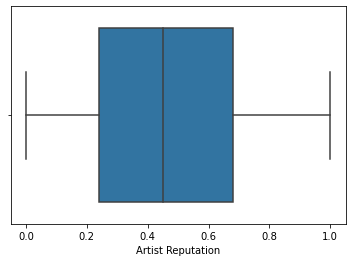

In [56]:
# box plot using seaborn 
# box plot for Artist Reputation column
sns.boxplot(train_data['Artist Reputation'])

<AxesSubplot:xlabel='Height'>

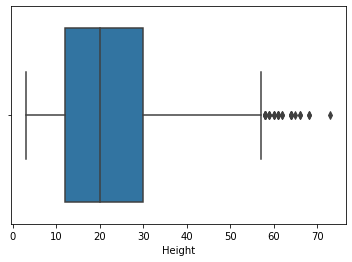

In [57]:
# box plot using seaborn 
# box plot for Height column
sns.boxplot(train_data['Height'])

<AxesSubplot:xlabel='Width'>

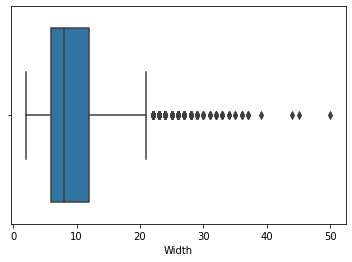

In [58]:
# box plot using seaborn 
# box plot for Width column
sns.boxplot(train_data['Width'])

<AxesSubplot:xlabel='Weight'>

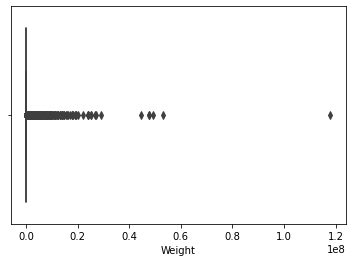

In [59]:
# box plot using seaborn 
# box plot for Weight column
sns.boxplot(train_data['Weight'])

<AxesSubplot:xlabel='Cost'>

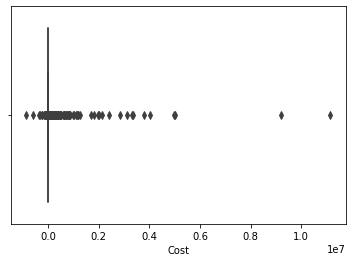

In [60]:
# box plot using seaborn 
# box plot for Cost column
sns.boxplot(train_data['Cost'])

# Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='Height', ylabel='Width'>

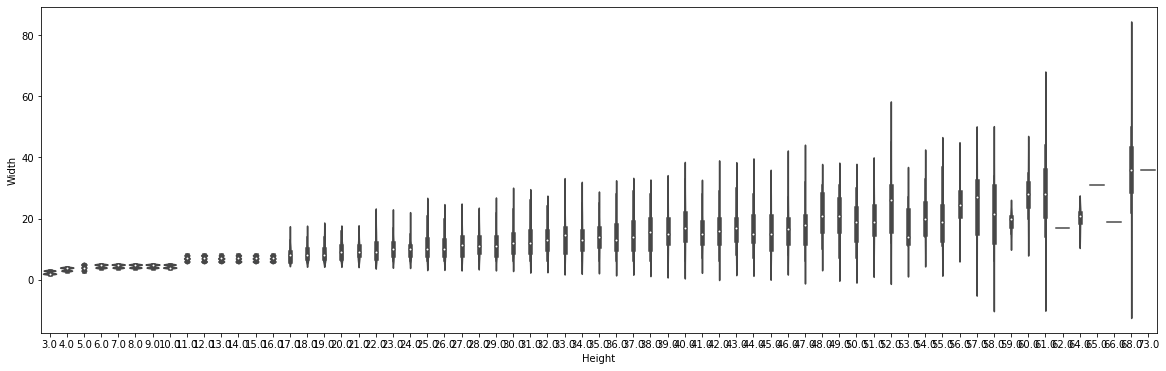

In [61]:
# violin plot for Height and Width columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Width', data=train_data, palette='rainbow')


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The Width range is increasing as we move right on the axis of Height

<AxesSubplot:xlabel='Height', ylabel='Artist Reputation'>

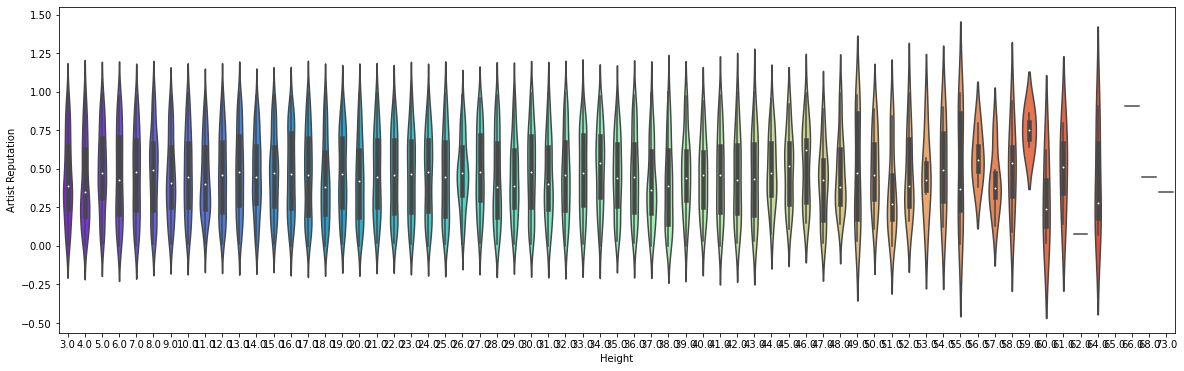

In [62]:
# violin plot for Height and Artist Reputation columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Artist Reputation', data=train_data, palette='rainbow')

### from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

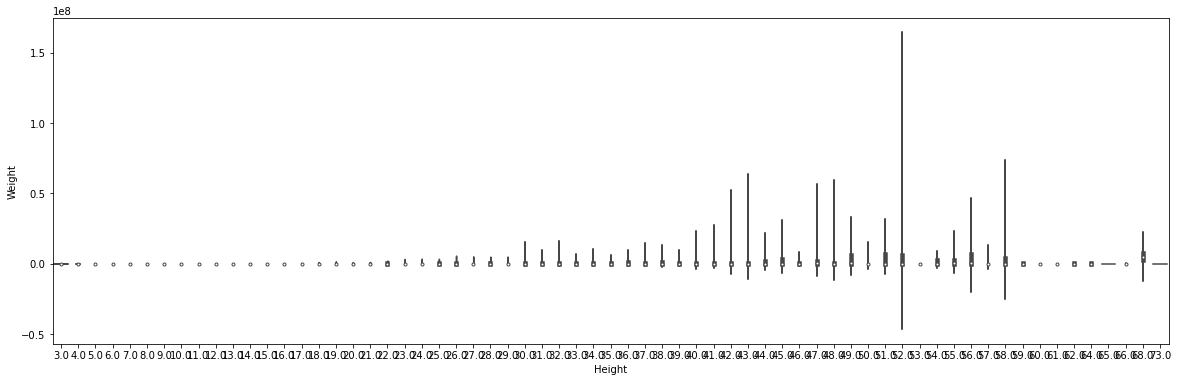

In [63]:
# violin plot for Height and Weight columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Weight', data=train_data, palette='rainbow')

### from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Weight distribution for all values of height is simmilar.
4. The Weight range is increasing and then decreases as we move right on the axis of Height

<AxesSubplot:xlabel='Height', ylabel='Price Of Sculpture'>

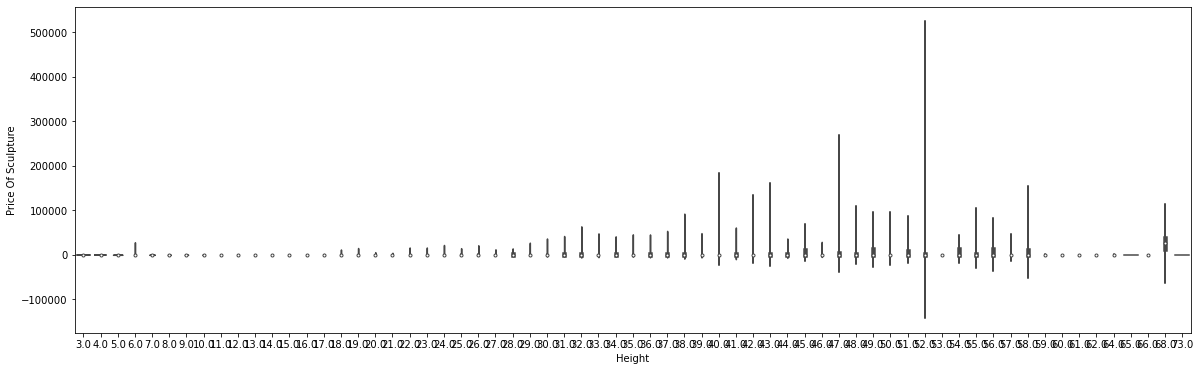

In [64]:
# violin plot for Height and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Price Of Sculpture', data=train_data, palette='rainbow')

### from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Price Of Sculpture distribution for all values of height is simmilar.
4. The Price Of Sculpture range is increasing and then decreases as we move right on the axis of Height
5. There is very weak correlataion between Price Of Sculpture and Height.

<AxesSubplot:xlabel='Height', ylabel='Base Shipping Price'>

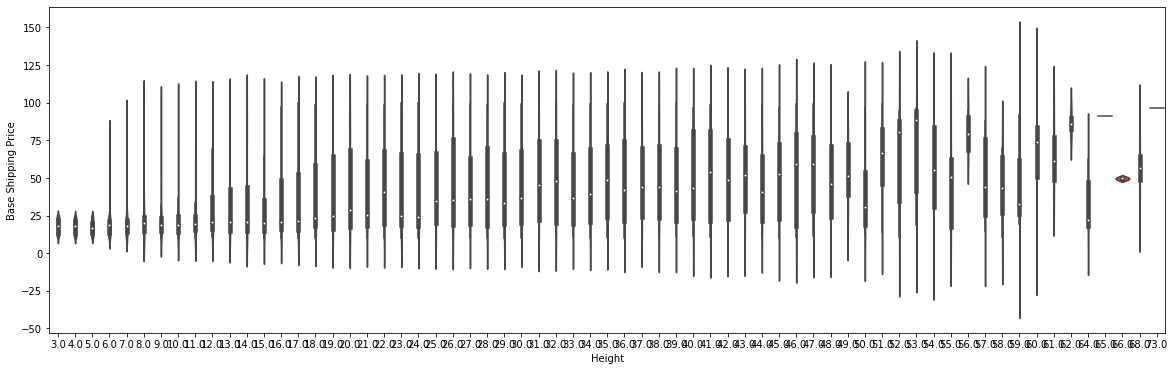

In [65]:
# violin plot for Height and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Base Shipping Price', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is unsymmetrical.

2. Also there is higher observation probability at the between first quartile and third quartile.

3. Base Shipping Price distribution for all values of height is not simmilar.

4. The Base Shipping Price range is increasing and then decreases as we move right on the axis of Height

<AxesSubplot:xlabel='Height', ylabel='Cost'>

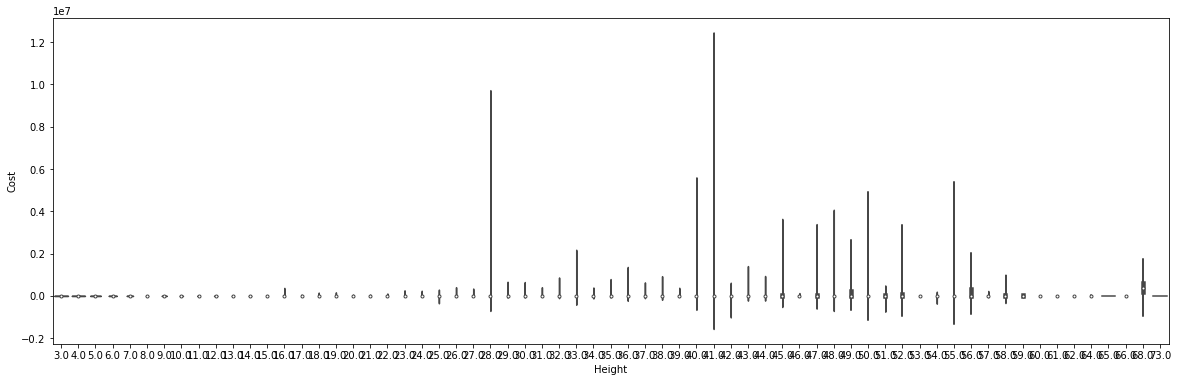

In [66]:
# violin plot for Height and Cost columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Height', y='Cost', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is almost symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. Cost distribution for all values of height is simmilar.
4. The Cost range is increasing and then decreases as we move right on the axis of Height

<AxesSubplot:xlabel='Artist Reputation', ylabel='Width'>

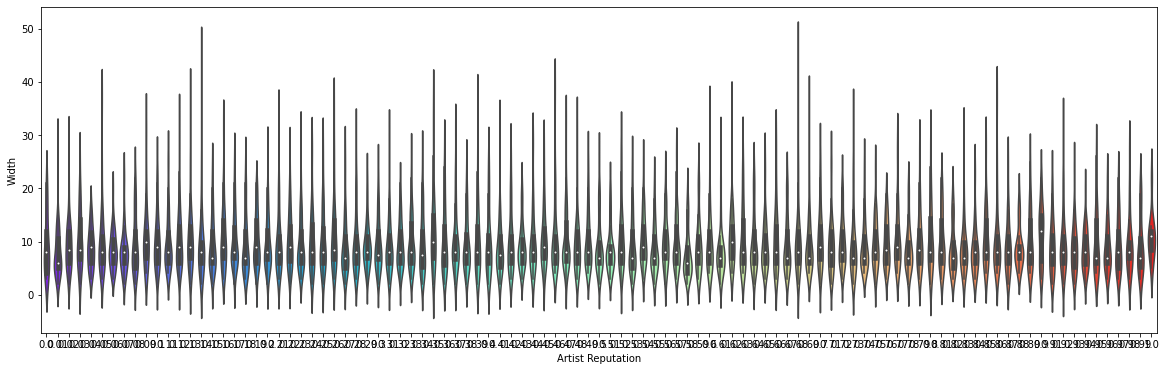

In [67]:
# violin plot for Artist Reputation and Width columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Artist Reputation', y='Width', data=train_data, palette='rainbow')

from above violin plot:

1. Width distribution for all values of Artist Reputation is simmilar.

2. The Width and Artist Reputation have no correlation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Weight'>

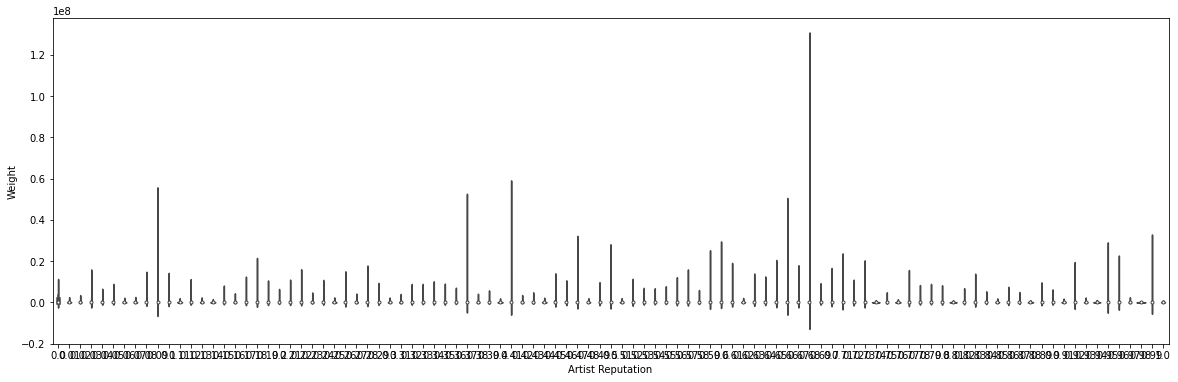

In [68]:
# violin plot for Artist Reputation and Weight columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Artist Reputation', y='Weight', data=train_data, palette='rainbow')


from above violin plot:

1. Weight distribution for all values of Artist Reputation is simmilar.

2. The Weight and Artist Reputation have no correlation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

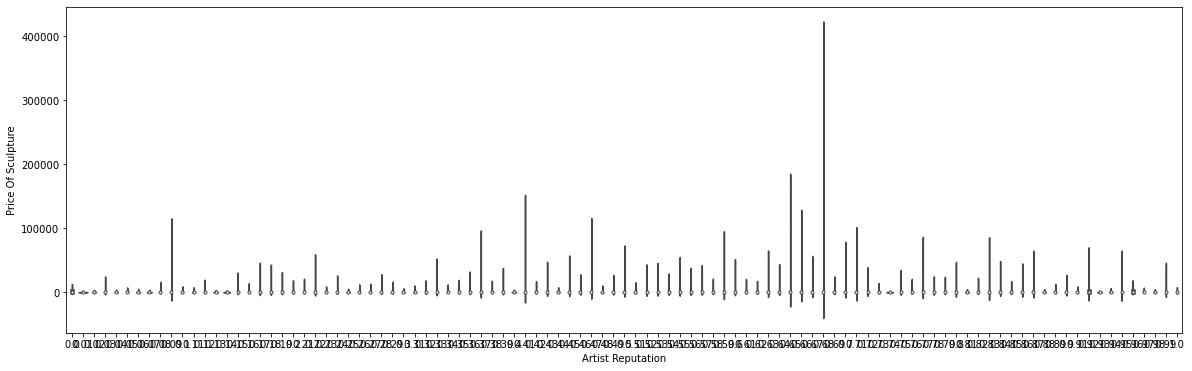

In [69]:
# violin plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Artist Reputation', y='Price Of Sculpture', data=train_data, palette='rainbow')


from above violin plot:

1. Price Of Sculpture distribution for all values of Artist Reputation is simmilar.

2. The Price Of Sculpture and Artist Reputation have no correlation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Base Shipping Price'>

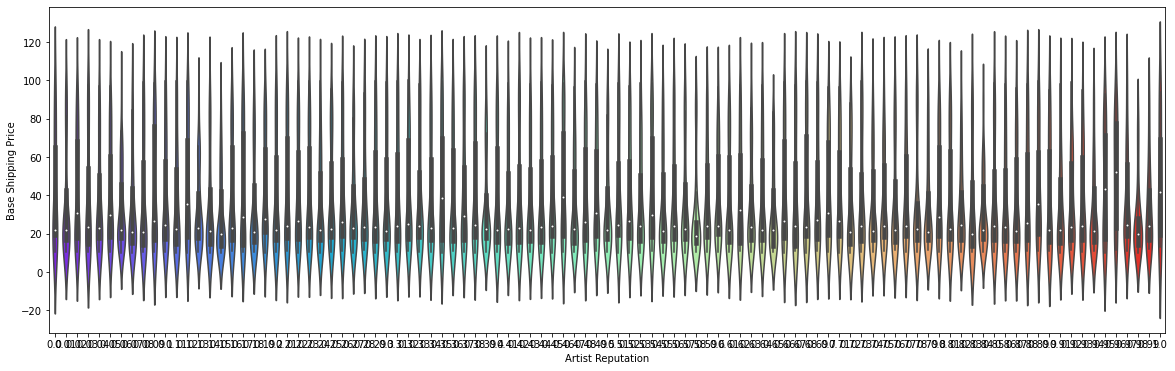

In [70]:
# violin plot for Artist Reputation and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Artist Reputation', y='Base Shipping Price', data=train_data, palette='rainbow')


from above violin plot:

1. Base Shipping Price distribution for all values of Artist Reputation is simmilar.

2. The Base Shipping Price and Artist Reputation have no correlation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

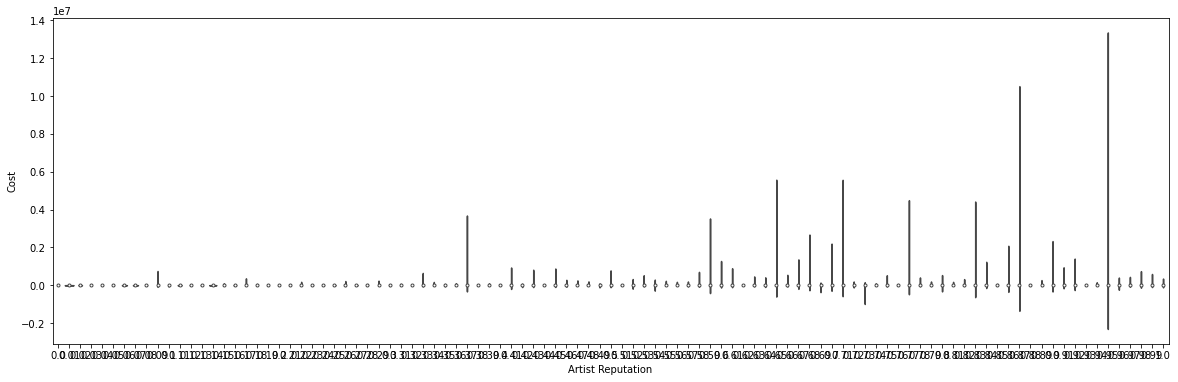

In [71]:
# violin plot for Artist Reputation and Cost columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Artist Reputation', y='Cost', data=train_data, palette='rainbow')


from above violin plot:

1. Cost distribution for all values of Artist Reputation is simmilar.

2. The Cost and Artist Reputation have no correlation

<AxesSubplot:xlabel='Width', ylabel='Weight'>

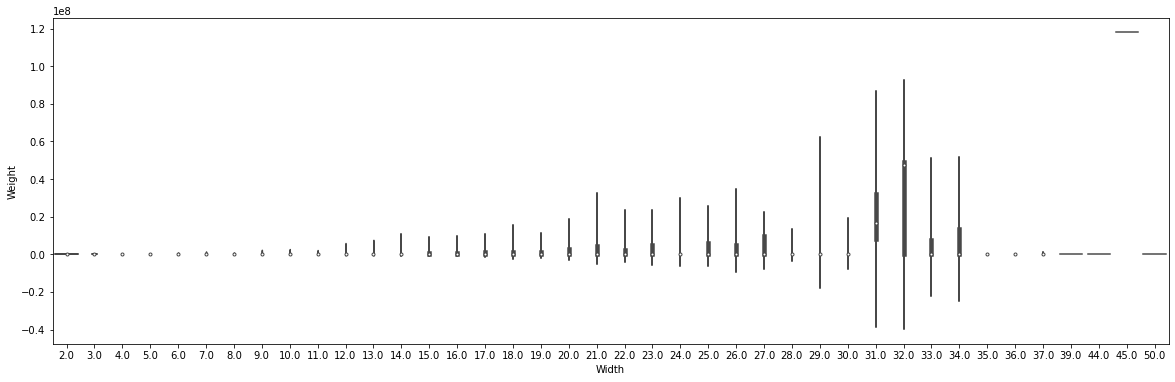

In [72]:
# violin plot for Width and Weight columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Width', y='Weight', data=train_data, palette='rainbow')


from above violin plot:

The Weight and Width have very weak correlation

<AxesSubplot:xlabel='Width', ylabel='Price Of Sculpture'>

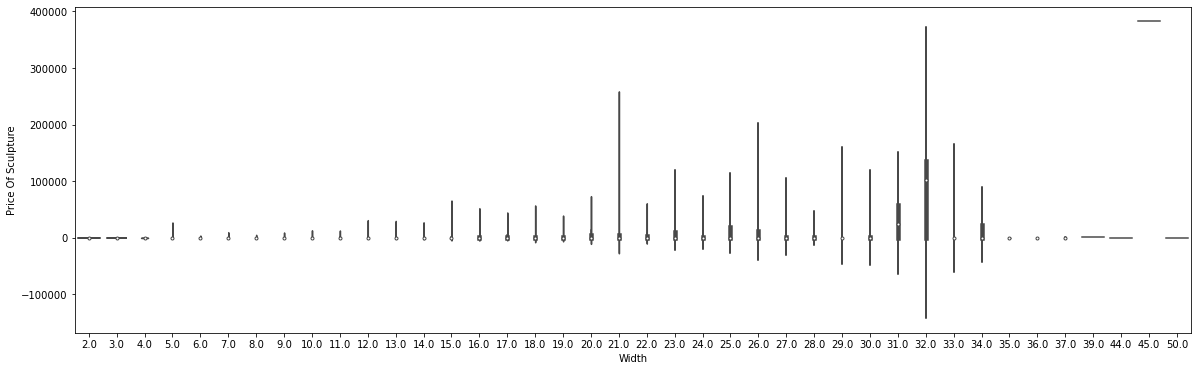

In [73]:
# violin plot for Width and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Width', y='Price Of Sculpture', data=train_data, palette='rainbow')


from above violin plot:

The Price Of Sculpture and Width have very weak correlation

<AxesSubplot:xlabel='Width', ylabel='Base Shipping Price'>

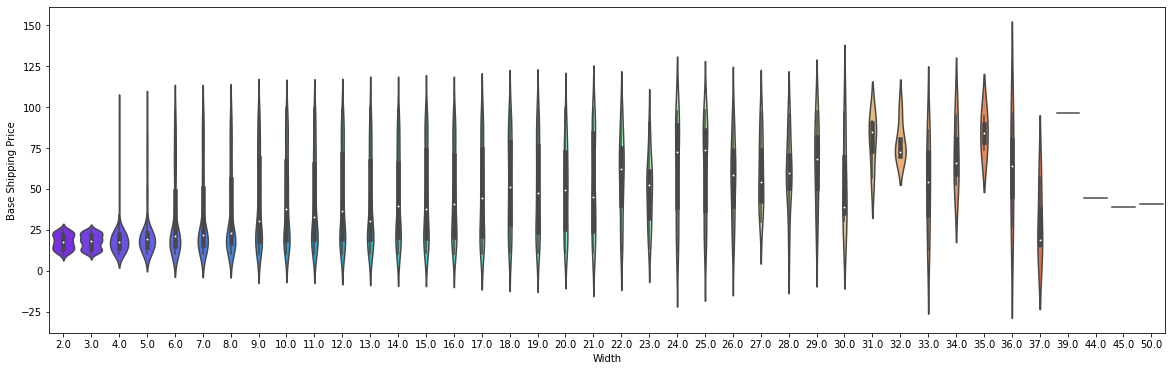

In [74]:
# violin plot for Width and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Width', y='Base Shipping Price', data=train_data, palette='rainbow')


from above violin plot:

The Base shipping price and Width are weakly correlated

<AxesSubplot:xlabel='Width', ylabel='Cost'>

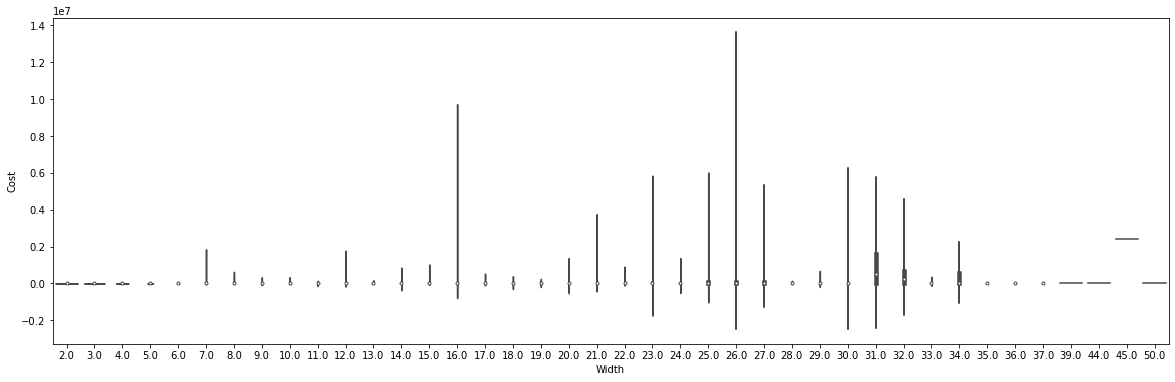

In [75]:
# violin plot for Width and Cost columns
plt.figure(figsize=(20,6))
sns.violinplot(x='Width', y='Cost', data=train_data, palette='rainbow')


from above violin plot:

The Cost and Width have no correlation

#  Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='Artist Reputation', ylabel='Height'>

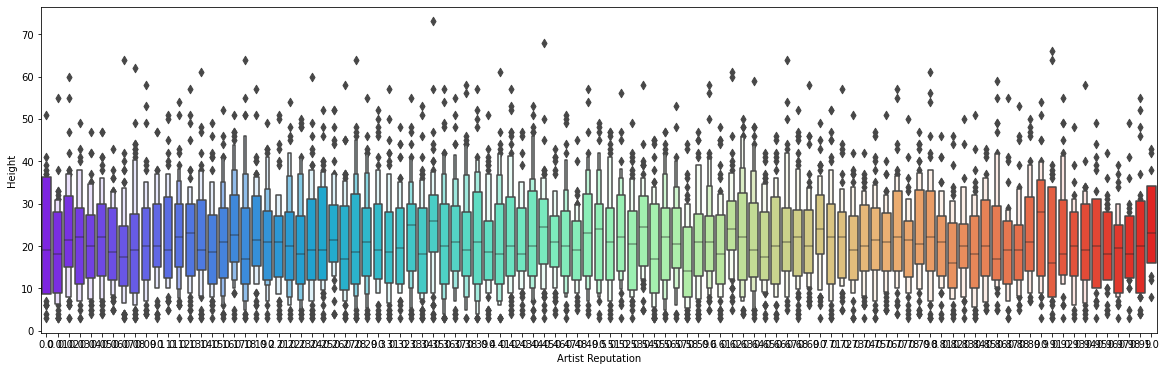

In [76]:
# Boxen plot for Artist Reputation and Height columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Height', data=train_data, palette='rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no relation between height and Artist Reputation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Width'>

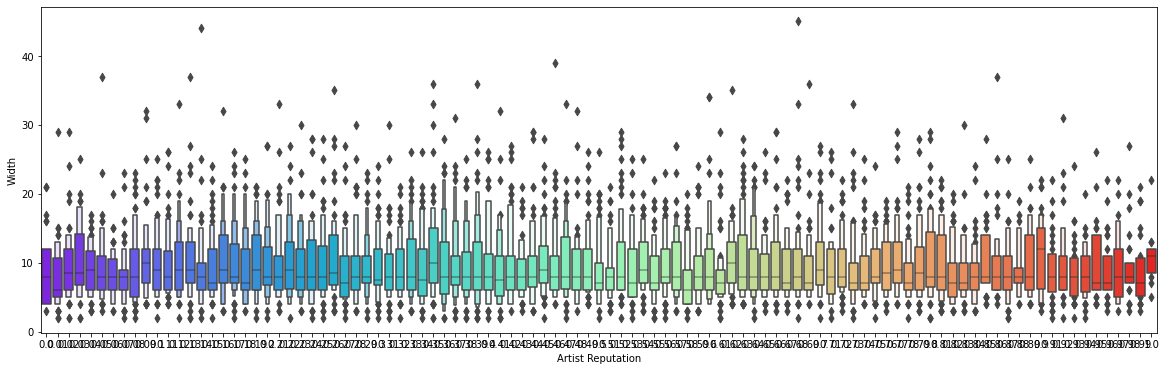

In [77]:
# Boxen plot for Artist Reputation and Width columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Width', data=train_data, palette='rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no relation between Width and Artist Reputation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Weight'>

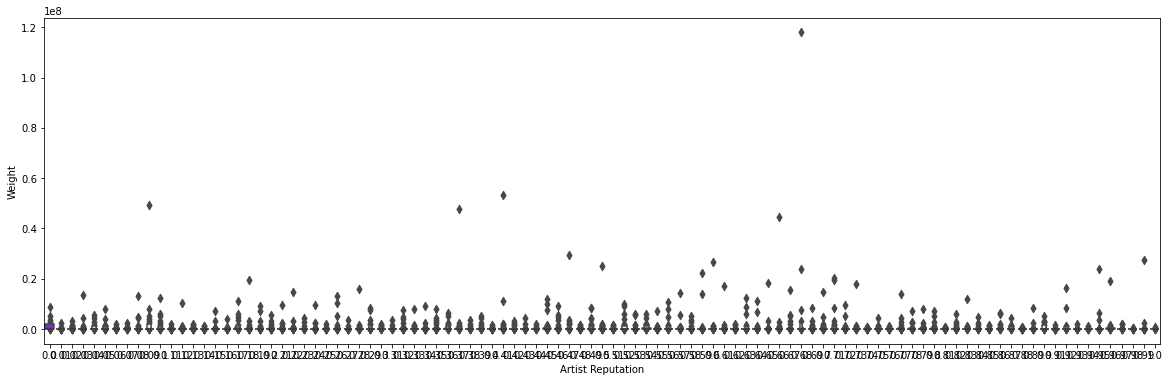

In [78]:
# Boxen plot for Artist Reputation and Weight columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Weight', data=train_data, palette='rainbow')

from above boxen plot:

values of weight are between 0.0 to 0.2 for most values of Artist reputation but there are some values above 0.2

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

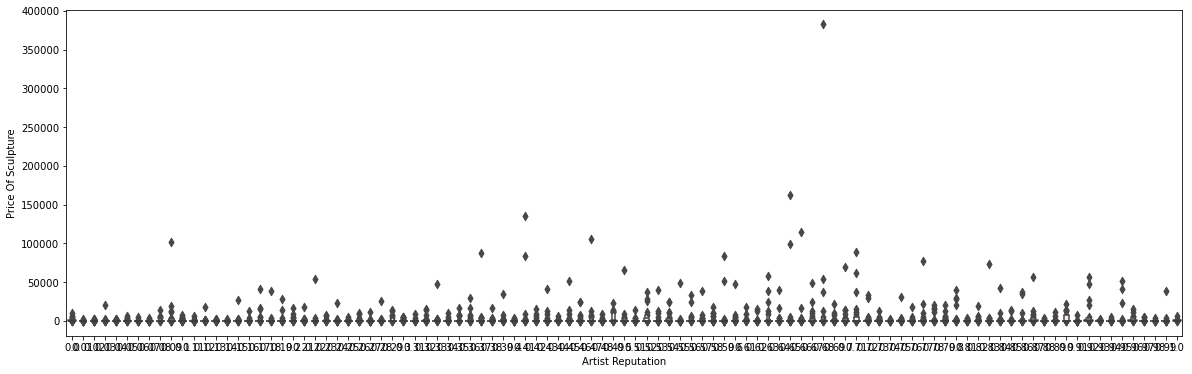

In [79]:
# Boxen plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Price Of Sculpture', data=train_data, palette='rainbow')

from above boxen plot:

values of price of sculpture are between 0.0 to 50000 for most values of Artist reputation but there are some values above 50000

<AxesSubplot:xlabel='Artist Reputation', ylabel='Base Shipping Price'>

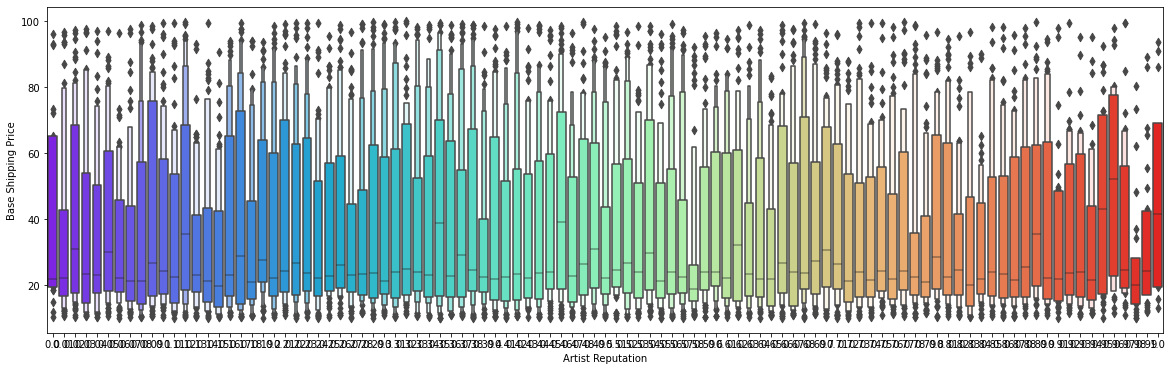

In [80]:
# Boxen plot for Artist Reputation and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Base Shipping Price', data=train_data, palette='rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. There is no rcorelation between Base Shipping Price and Artist Reputation

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

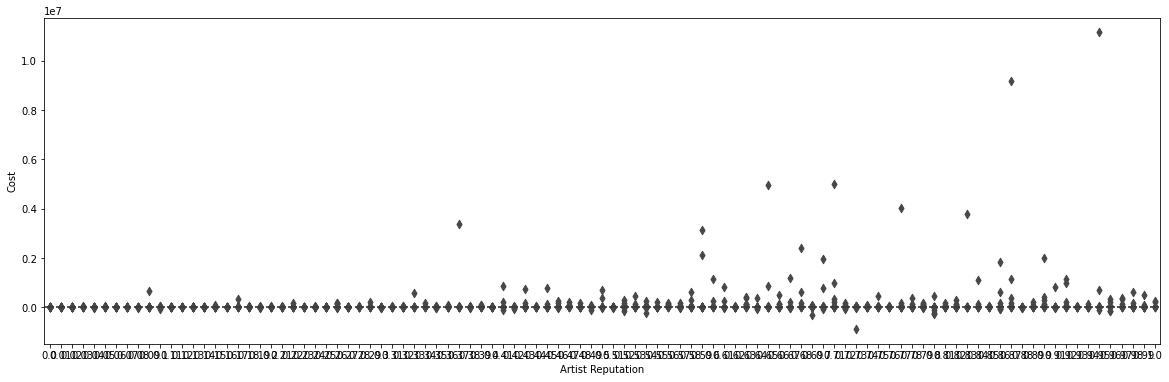

In [81]:
# Boxen plot for Artist Reputation and Cost columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Artist Reputation', y='Cost', data=train_data, palette='rainbow')

from above boxen plot:

values of cost are between 0.0 to 0.1 for most values of Artist reputation but there are some values above 0.1

<AxesSubplot:xlabel='Height', ylabel='Width'>

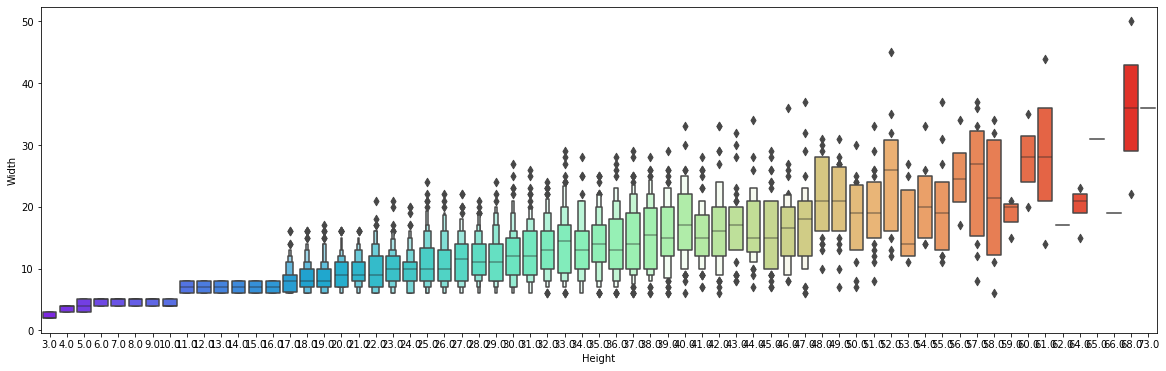

In [82]:
# Boxen plot for Height and Width columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Height', y='Width', data=train_data, palette='rainbow')

from above boxen plot:
1. There is a positive correlation between height and Width.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

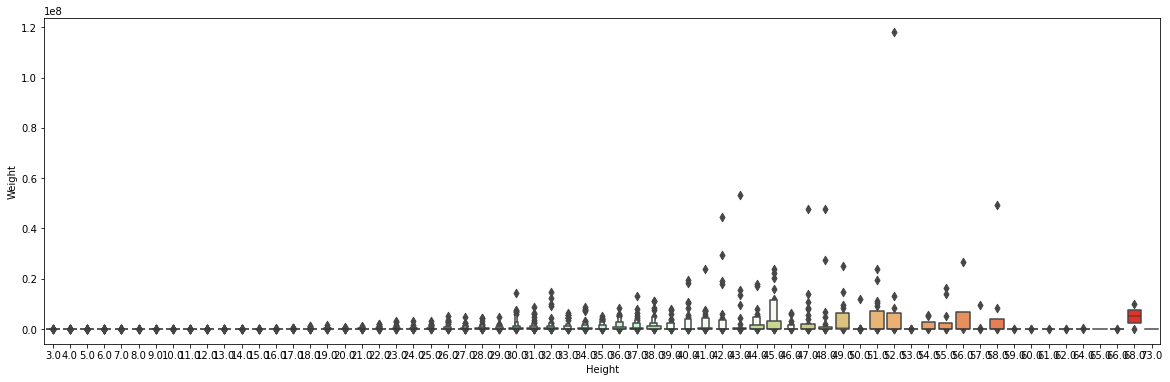

In [83]:
# Boxen plot for Height and Weight columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Height', y='Weight', data=train_data, palette='rainbow')

from above boxen plot:

range of values of weight increases with increase in height values and then decreases with decrease in height value.

values of weight are between 0.0 to 0.2 for most values of Height but there are some values above 0.2

<AxesSubplot:xlabel='Height', ylabel='Price Of Sculpture'>

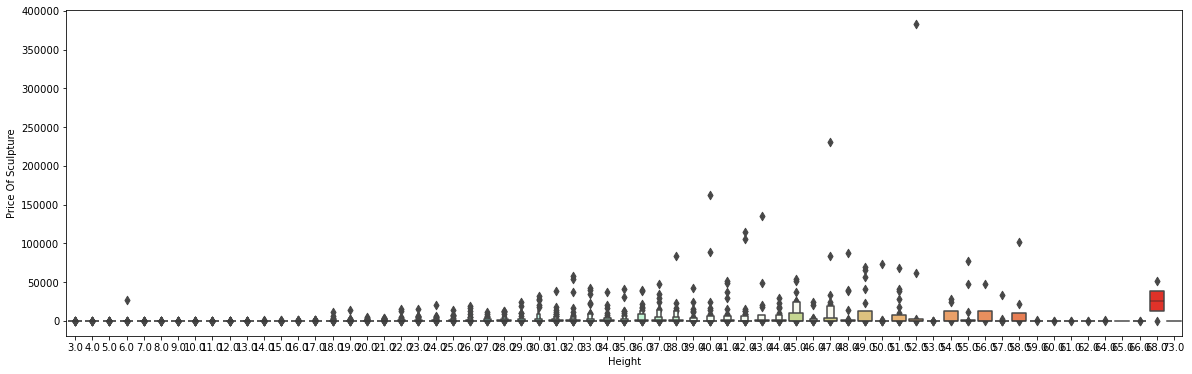

In [84]:
# Boxen plot for Height and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Height', y='Price Of Sculpture', data=train_data, palette='rainbow')


from above boxen plot:

range of values of weight price of sculpture with increase in height values and then decreases with decrease in height value.

values of weight are between 0.0 to 50000 for most values of Height but there are some values above 50000

<AxesSubplot:xlabel='Height', ylabel='Base Shipping Price'>

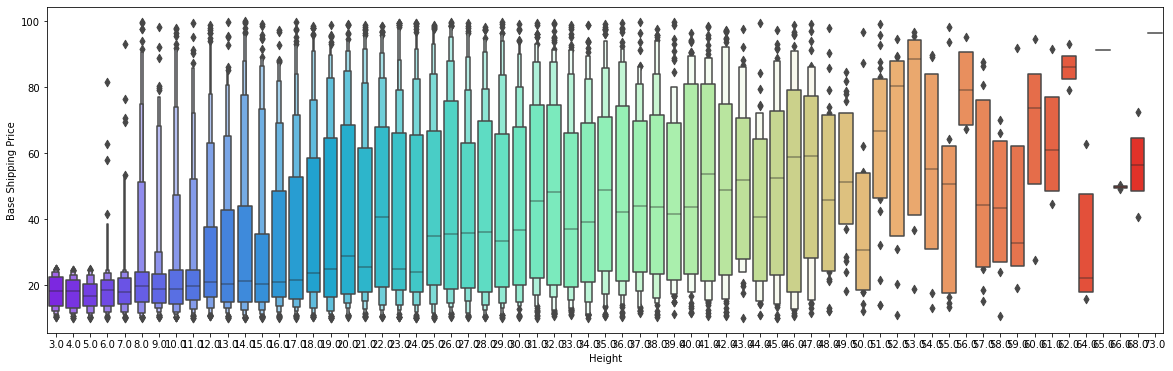

In [85]:
# Boxen plot for Height and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Height', y='Base Shipping Price', data=train_data, palette='rainbow')


from above boxen plot:

1. There is weak correlation between height and Base Shipping Price

<AxesSubplot:xlabel='Height', ylabel='Base Shipping Price'>

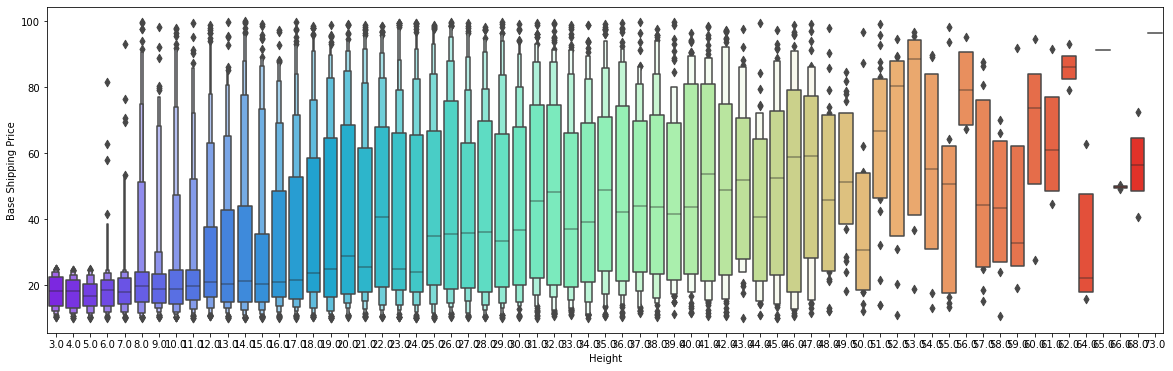

In [86]:
# Boxen plot for Height and Cost columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='Height', y='Base Shipping Price', data=train_data, palette='rainbow')


#  Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

<AxesSubplot:xlabel='Artist Reputation', ylabel='Height'>

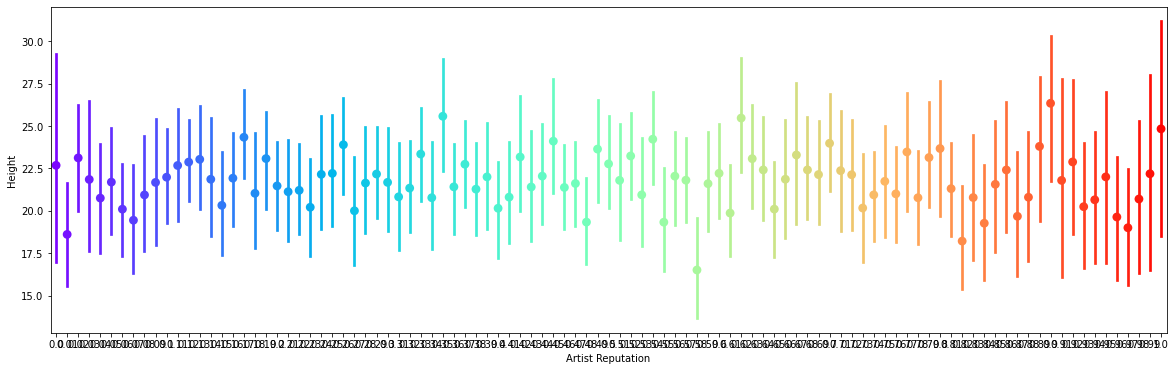

In [87]:
# point plot for Artist Reputation and Height columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Height', data=train_data, palette='rainbow')


From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Height has standard deviations of vales for each Artist Reputation value

<AxesSubplot:xlabel='Artist Reputation', ylabel='Width'>

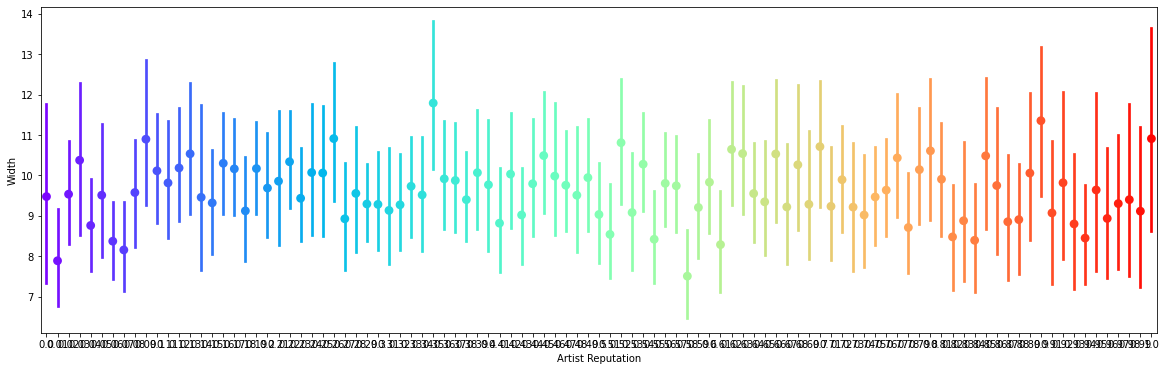

In [88]:
# point plot for Artist Reputation and Width columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Width', data=train_data, palette='rainbow')


From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Width has standard deviations of vales for each Artist Reputation value

<AxesSubplot:xlabel='Artist Reputation', ylabel='Weight'>

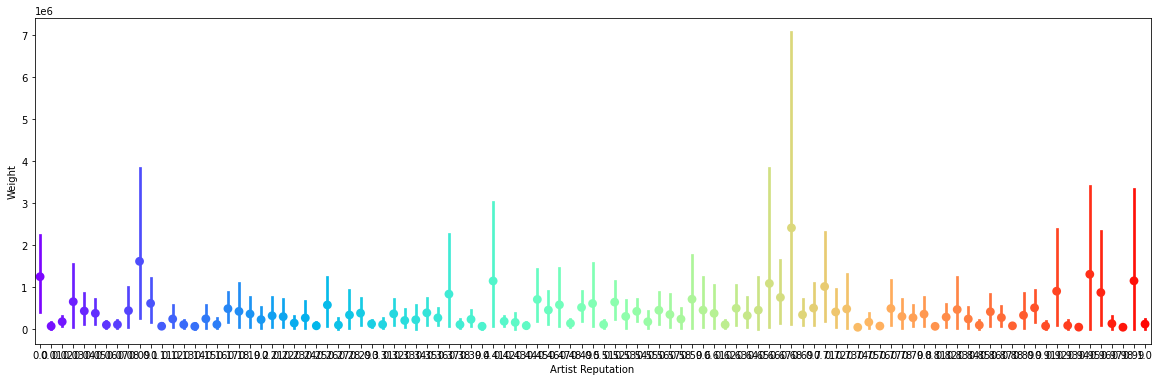

In [89]:
# point plot for Artist Reputation and Weight columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Weight', data=train_data, palette='rainbow')


From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the Weight has standard deviations of vales for each Artist Reputation value

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

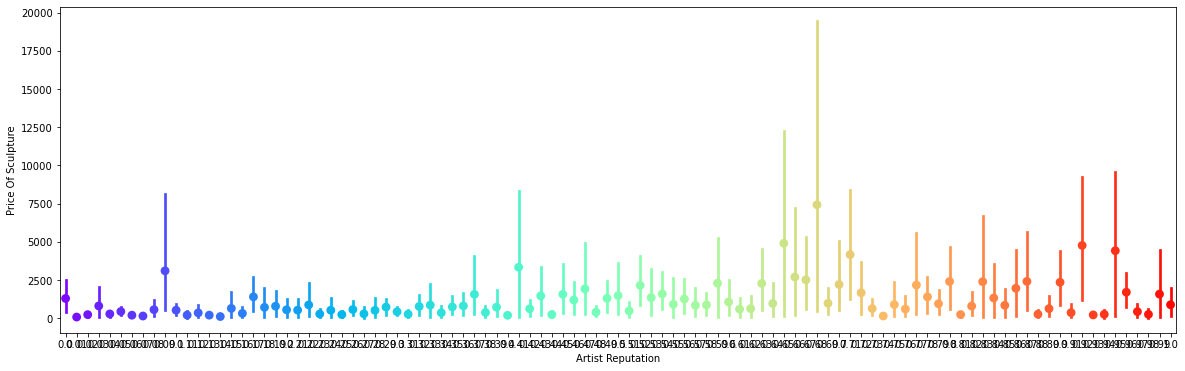

In [90]:
# point plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Price Of Sculpture', data=train_data, palette='rainbow')


<AxesSubplot:xlabel='Artist Reputation', ylabel='Base Shipping Price'>

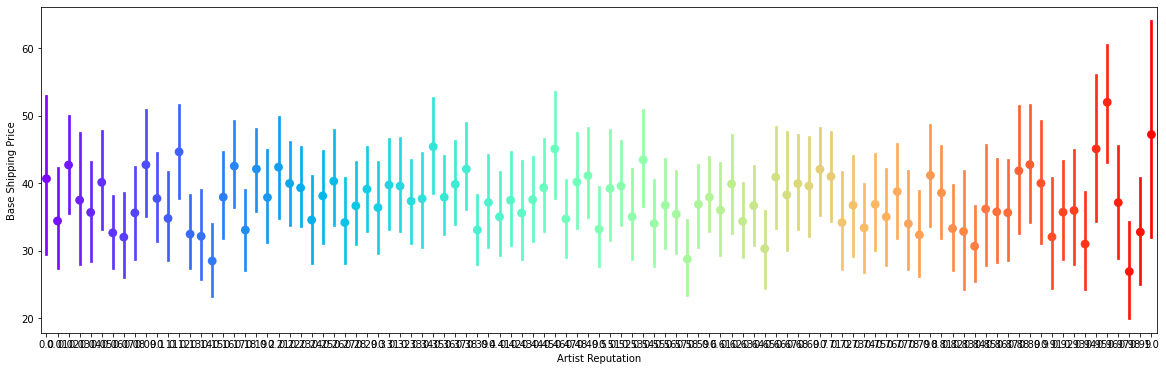

In [91]:
# point plot for Artist Reputation and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Base Shipping Price', data=train_data, palette='rainbow')

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

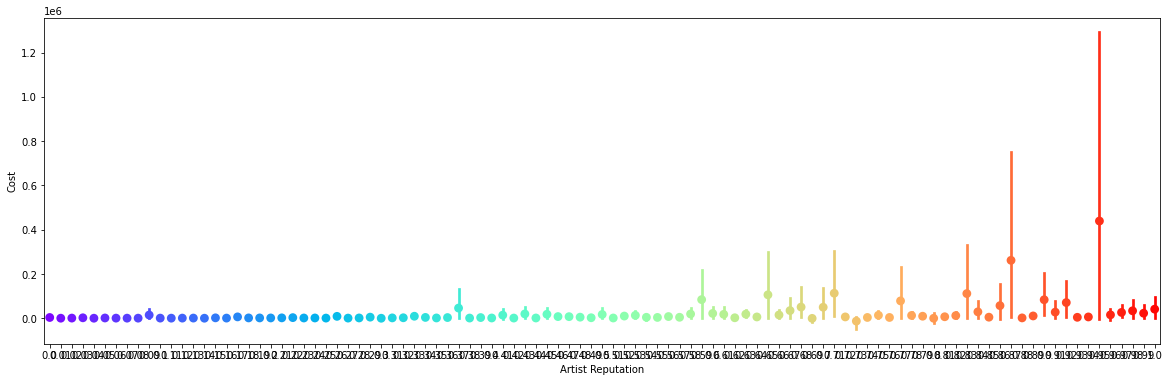

In [92]:
# point plot for Artist Reputation and Cost columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Artist Reputation', y='Cost', data=train_data, palette='rainbow')

<AxesSubplot:xlabel='Height', ylabel='Width'>

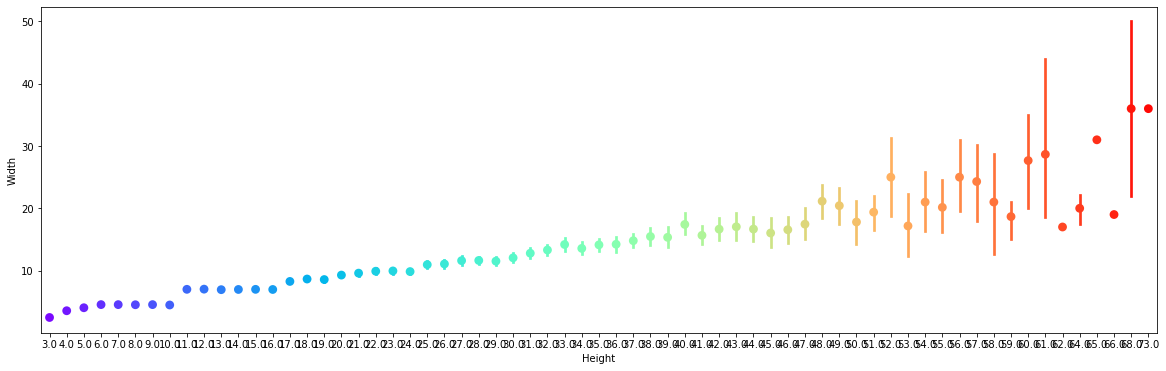

In [93]:
# point plot for Height and Widht columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Height', y='Width', data=train_data, palette='rainbow')

From above point plot

There is a increase in width when there is a increase in Height.
That is both are correlated

<AxesSubplot:xlabel='Height', ylabel='Weight'>

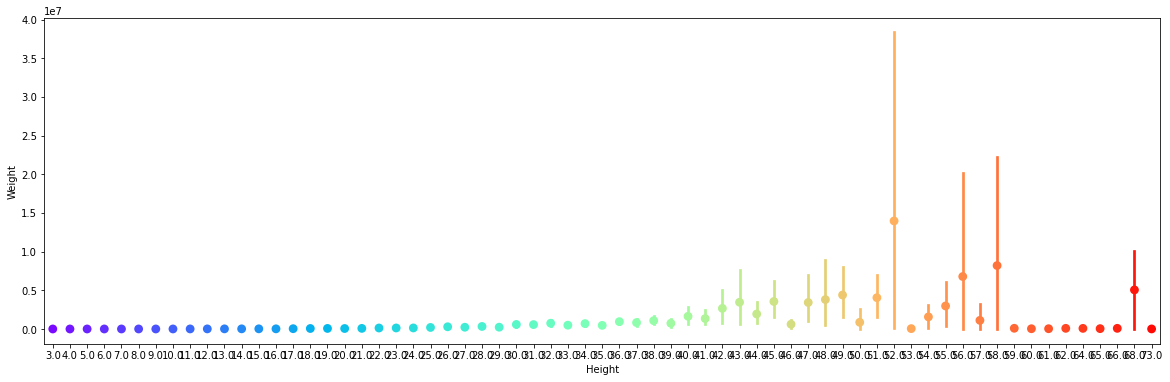

In [94]:
# point plot for Height and Weight columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Height', y='Weight', data=train_data, palette='rainbow')

From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

<AxesSubplot:xlabel='Height', ylabel='Price Of Sculpture'>

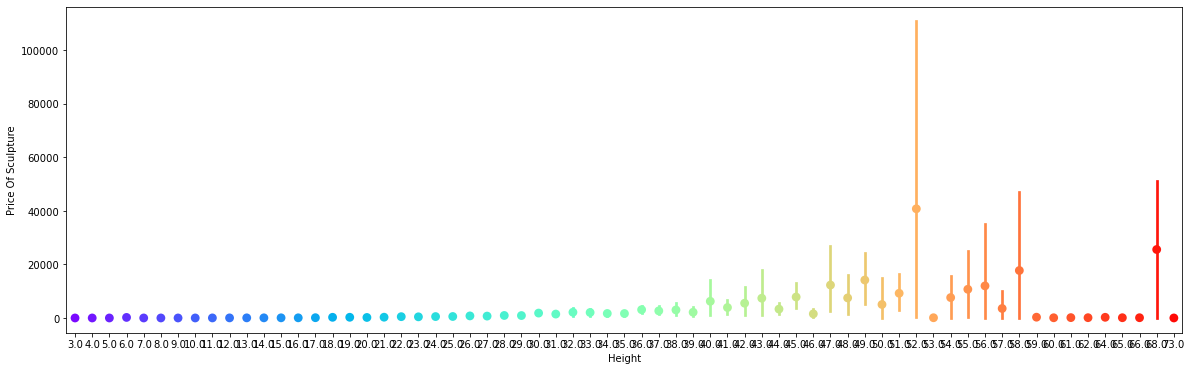

In [95]:
# point plot for Height and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Height', y='Price Of Sculpture', data=train_data, palette='rainbow')

From above pointplot

1. Most of the points are around 0.
2. Very few points above 0.

<AxesSubplot:xlabel='Height', ylabel='Base Shipping Price'>

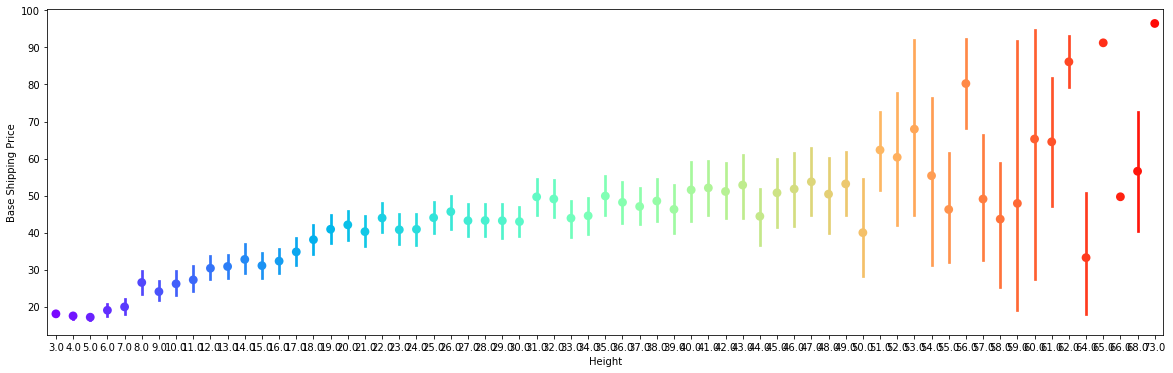

In [96]:
# point plot for Height and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.pointplot(x='Height', y='Base Shipping Price', data=train_data, palette='rainbow')

From above point plot

There is a increase in Base Shipping Price when there is a increase in Height. That is they are correlated

# Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='Artist Reputation', ylabel='count'>

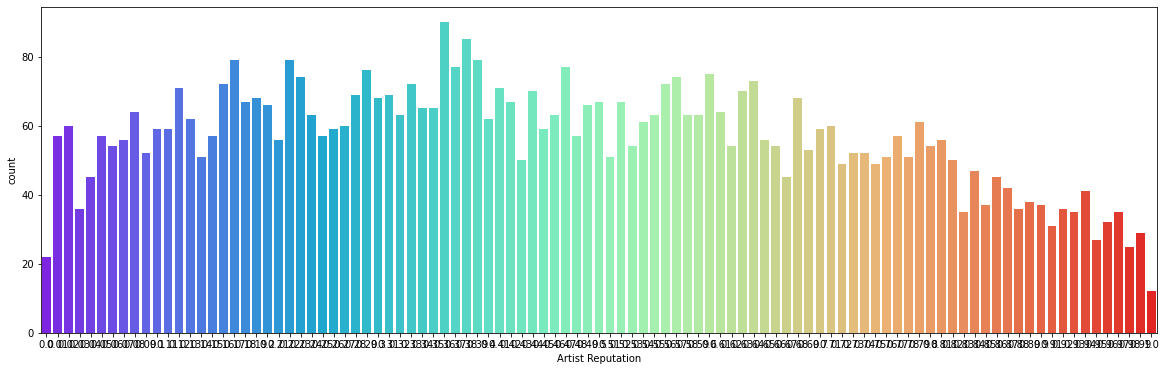

In [97]:
# count plot of whole datset based on Artist Reputation
plt.figure(figsize=(20,6))
sns.countplot(train_data['Artist Reputation'],palette='rainbow')

From above count plot

distribution of values over complete dataset is symmetrical.

<AxesSubplot:xlabel='Height', ylabel='count'>

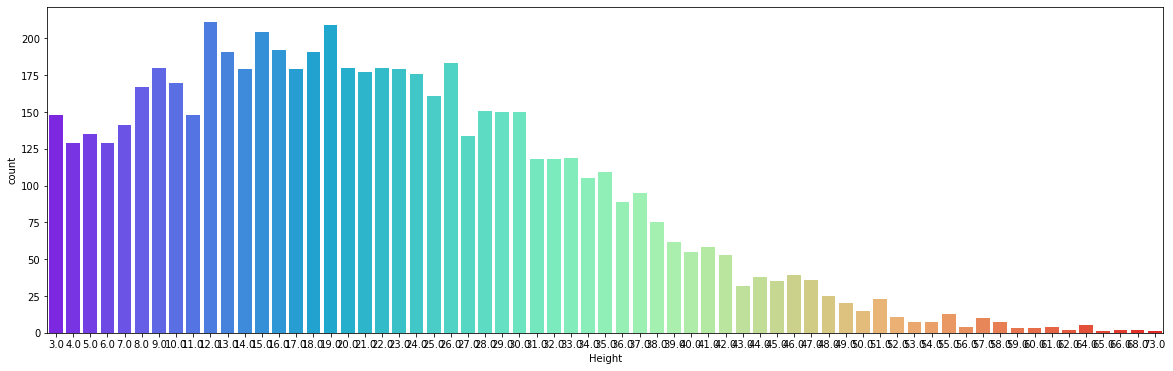

In [98]:
# count plot of whole datset based on Height
plt.figure(figsize=(20,6))
sns.countplot(train_data['Height'],palette='rainbow')

<AxesSubplot:xlabel='Width', ylabel='count'>

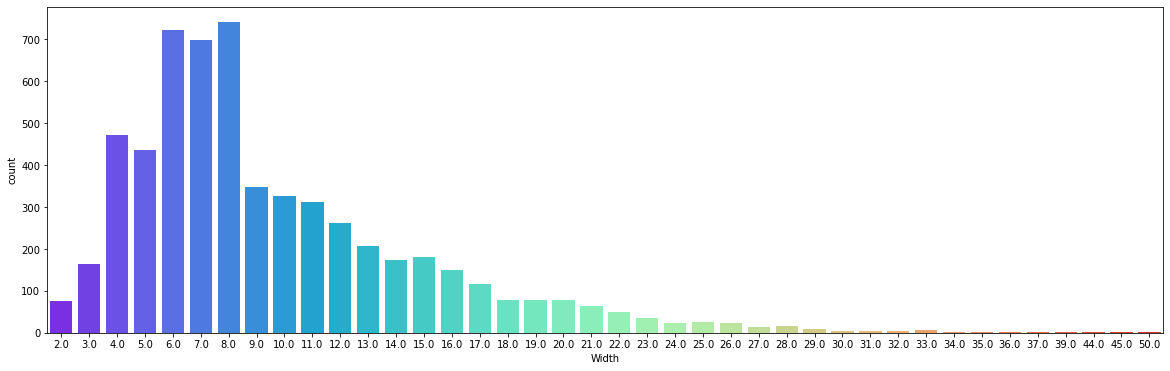

In [99]:
# count plot of whole datset based on Width
plt.figure(figsize=(20,6))
sns.countplot(train_data['Width'],palette='rainbow')

From above count plot

distribution of values over complete dataset are skewed left.

<AxesSubplot:xlabel='Weight', ylabel='count'>

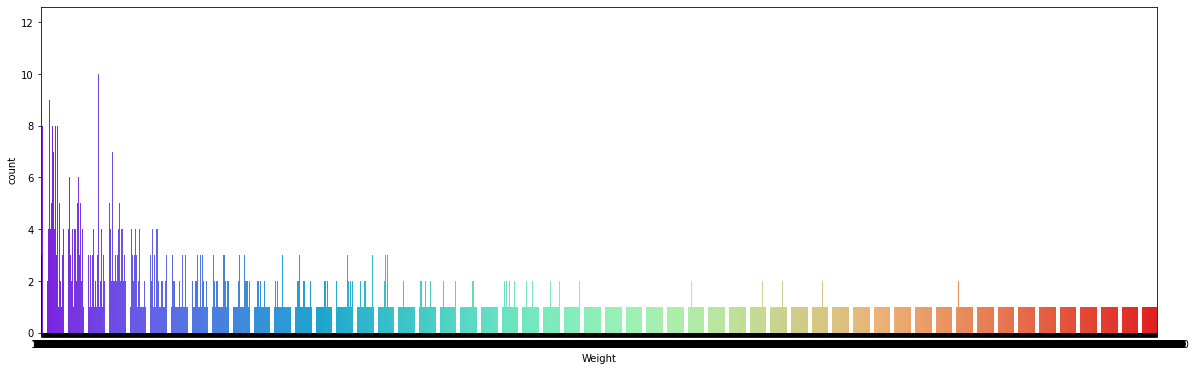

In [100]:
# count plot of whole datset based on Weight
plt.figure(figsize=(20,6))
sns.countplot(train_data['Weight'],palette='rainbow')

From above count plot

distribution of values over complete dataset are skewed left., multimodal

<AxesSubplot:xlabel='Price Of Sculpture', ylabel='count'>

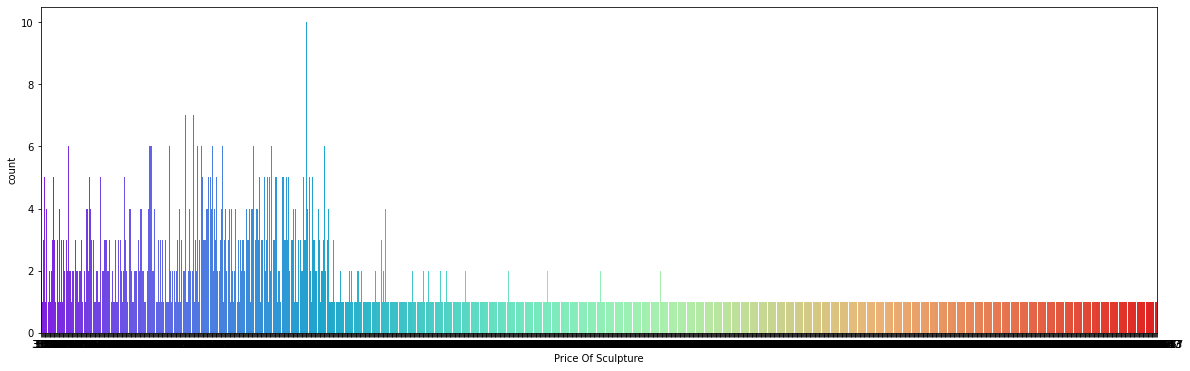

In [101]:
# count plot of whole datset based on Price Of Sculpture
plt.figure(figsize=(20,6))
sns.countplot(train_data['Price Of Sculpture'][:2000],palette='rainbow')

From above count plot

distribution of values over complete dataset are skewed left, multimodal.

<AxesSubplot:xlabel='Base Shipping Price', ylabel='count'>

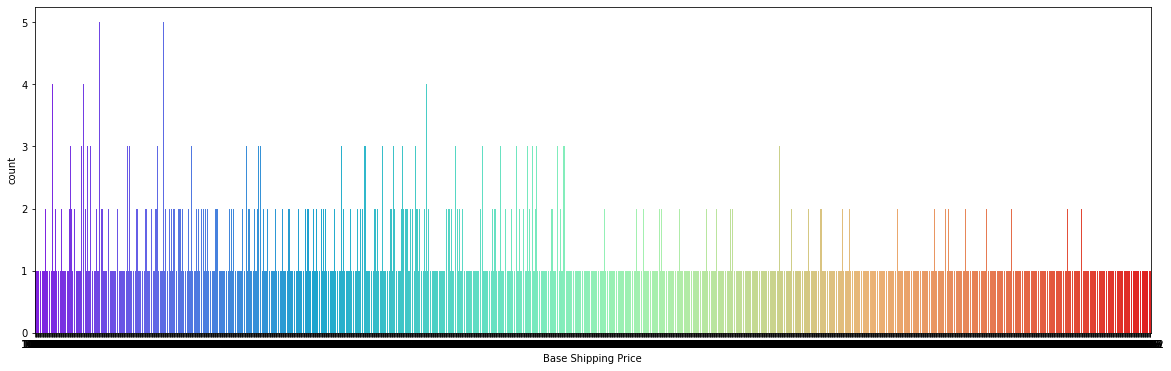

In [102]:
# count plot of whole datset based on Base Shipping Price
plt.figure(figsize=(20,6))
sns.countplot(train_data['Base Shipping Price'][:2000],palette='rainbow')

From above count plot

distribution of values over complete dataset are skewed left, multimodal.

<AxesSubplot:xlabel='Cost', ylabel='count'>

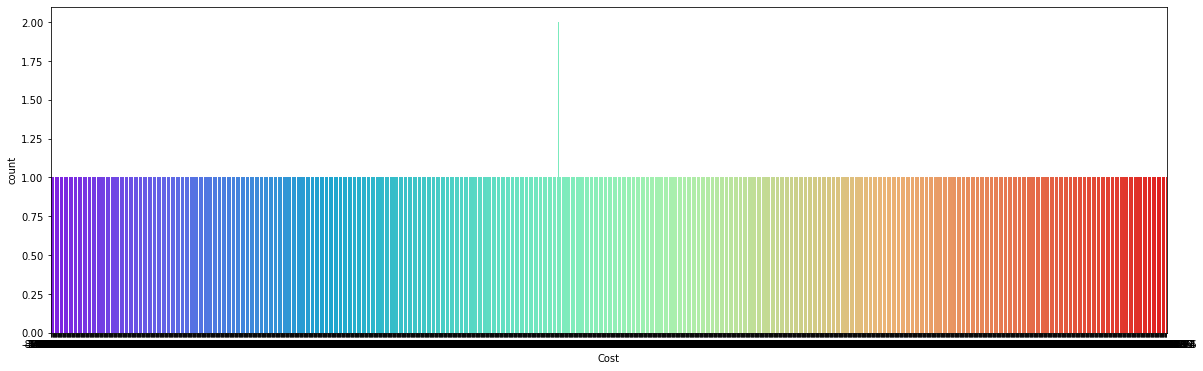

In [4]:
# count plot of whole datset based on Cost
plt.figure(figsize=(20,6))
sns.countplot(train_data['Cost'][:2000],palette='rainbow')

From above count plot

distribution of values over complete dataset are multi model that is more than one peak.

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='Artist Reputation', ylabel='Height'>

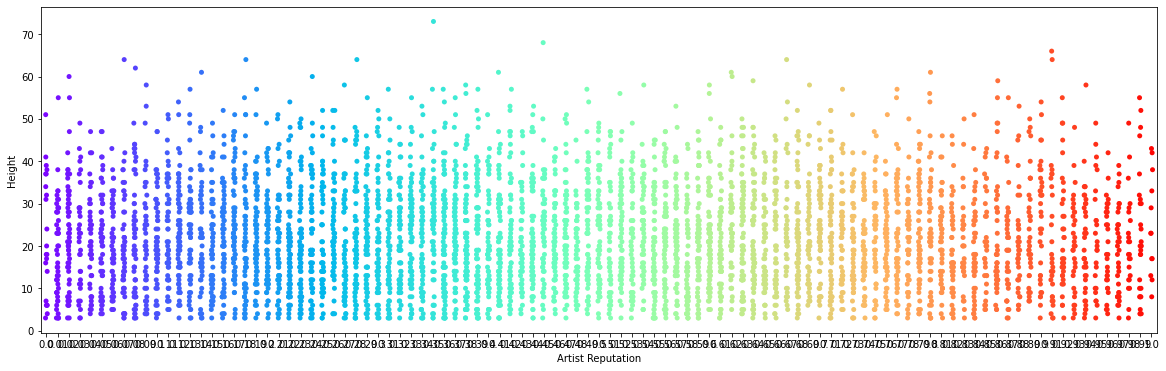

In [5]:
# strip plot between Artist Reputation and Height columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Height', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

<AxesSubplot:xlabel='Artist Reputation', ylabel='Width'>

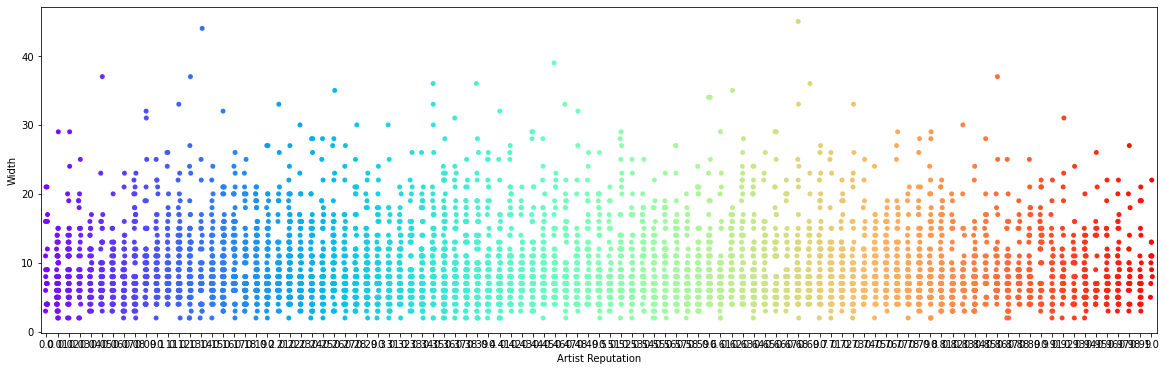

In [6]:
# strip plot between Artist Reputation and Width columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Width', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Width with repect to Artist Reputation is between 0 to 30.
2. few values are above 30

<AxesSubplot:xlabel='Artist Reputation', ylabel='Weight'>

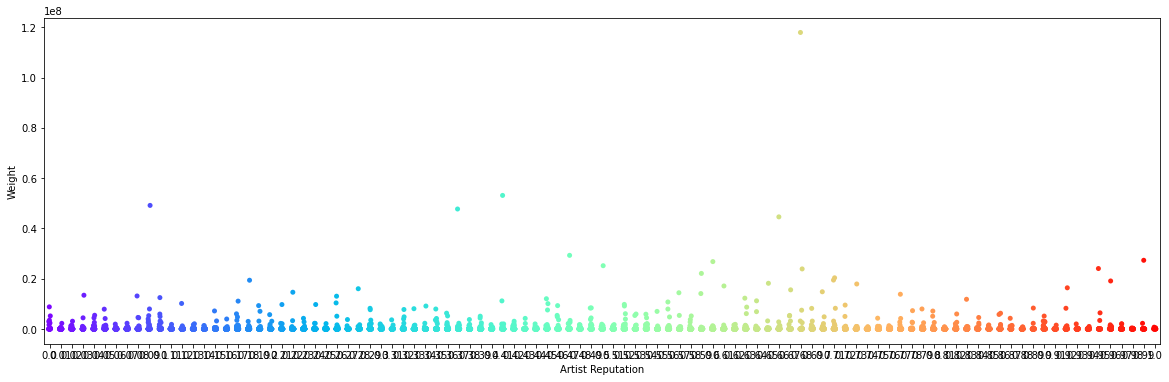

In [7]:
# strip plot between Artist Reputation and Weight columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Weight', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Weight with repect to Artist Reputation are between 0 and 0.1.
2. few values are above 0.1.

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

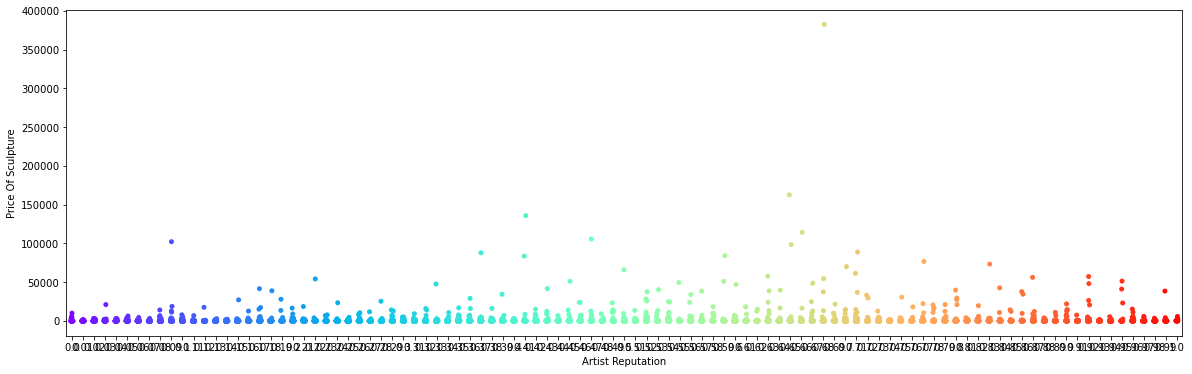

In [8]:
# strip plot between Artist Reputation and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Price Of Sculpture', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Price of Sculpture with repect to Artist Reputation is between 0 to 1000.
2. few values are above 1000

<AxesSubplot:xlabel='Artist Reputation', ylabel='Base Shipping Price'>

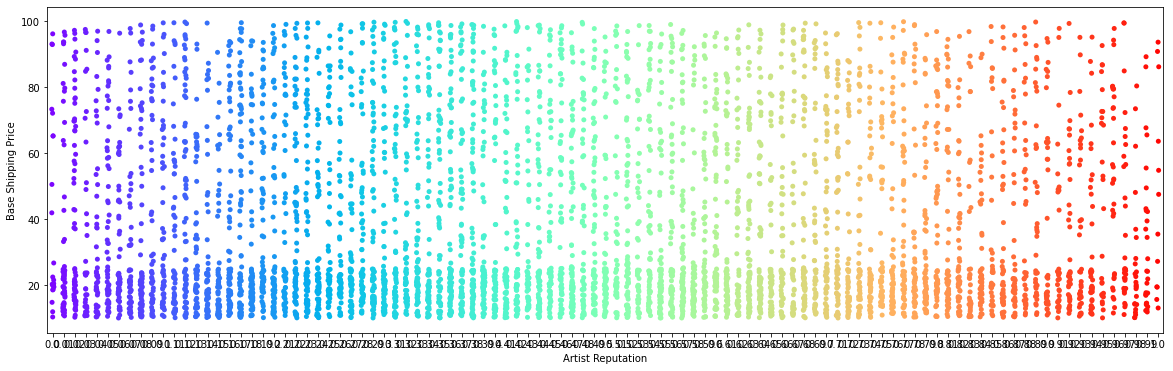

In [9]:
# strip plot between Artist Reputation and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Base Shipping Price', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Base shipping price with repect to Artist Reputation is between 0 to 30.
2. few values are between 30 to 100

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

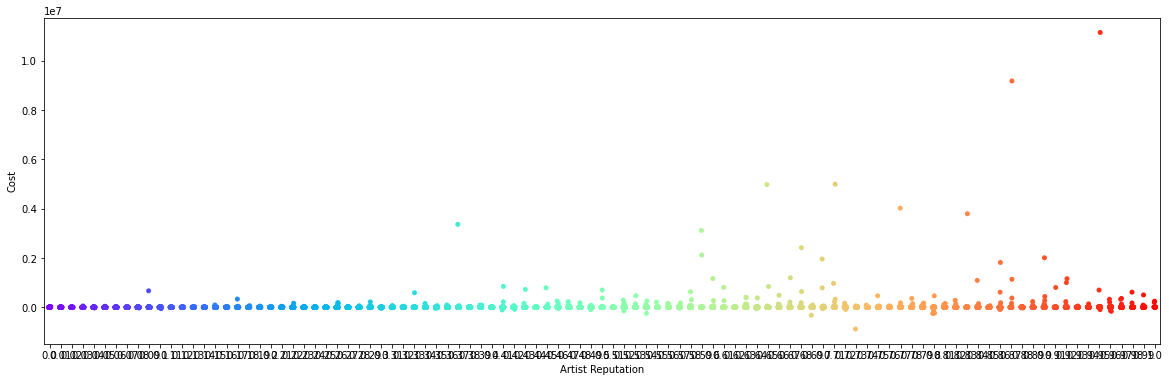

In [10]:
# strip plot between Artist Reputation and Cost columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Artist Reputation', y='Cost', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Cost with repect to Artist Reputation are around 0
2. few values are above 0

<AxesSubplot:xlabel='Height', ylabel='Width'>

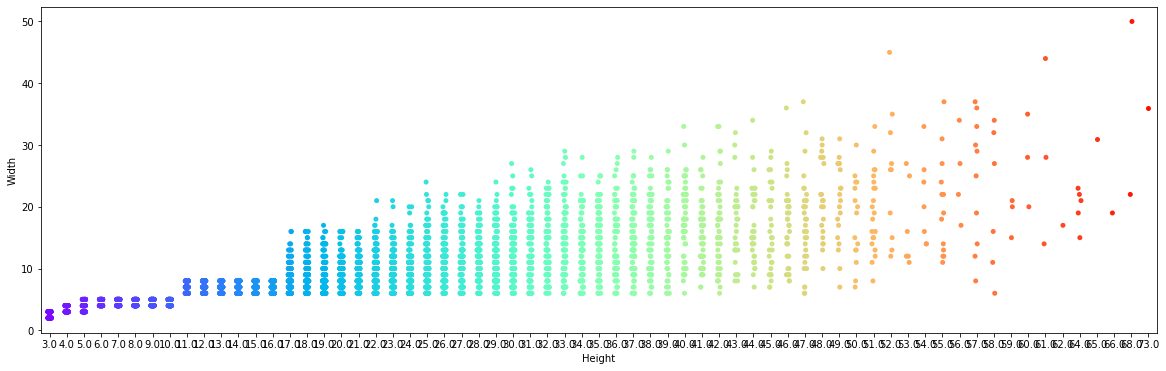

In [11]:
# strip plot between Height and Width columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Height', y='Width', data=train_data,palette='rainbow')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

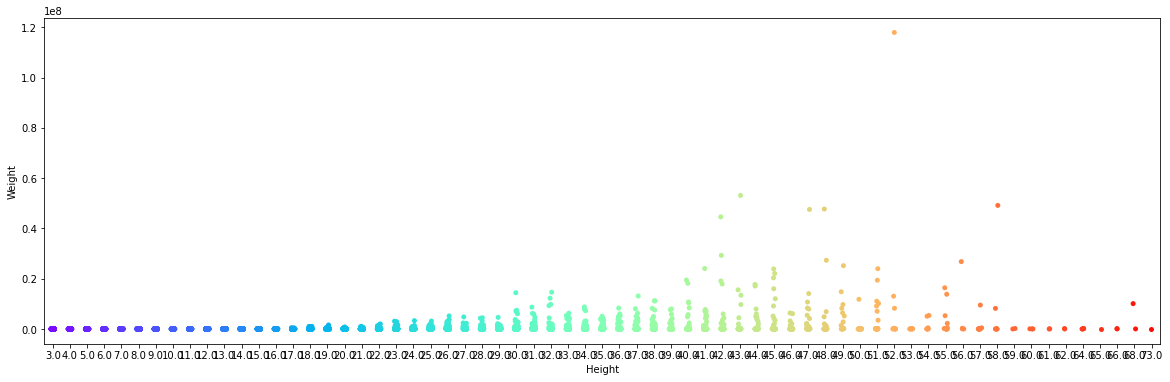

In [12]:
# strip plot between Height and Weight columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Height', y='Weight', data=train_data,palette='rainbow')

<AxesSubplot:xlabel='Height', ylabel='Price Of Sculpture'>

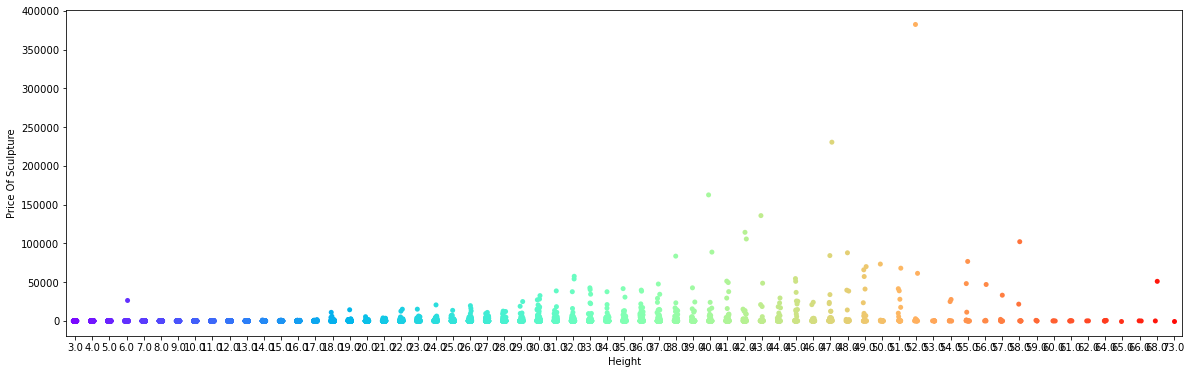

In [13]:
# strip plot between Height and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Height', y='Price Of Sculpture', data=train_data,palette='rainbow')

<AxesSubplot:xlabel='Height', ylabel='Base Shipping Price'>

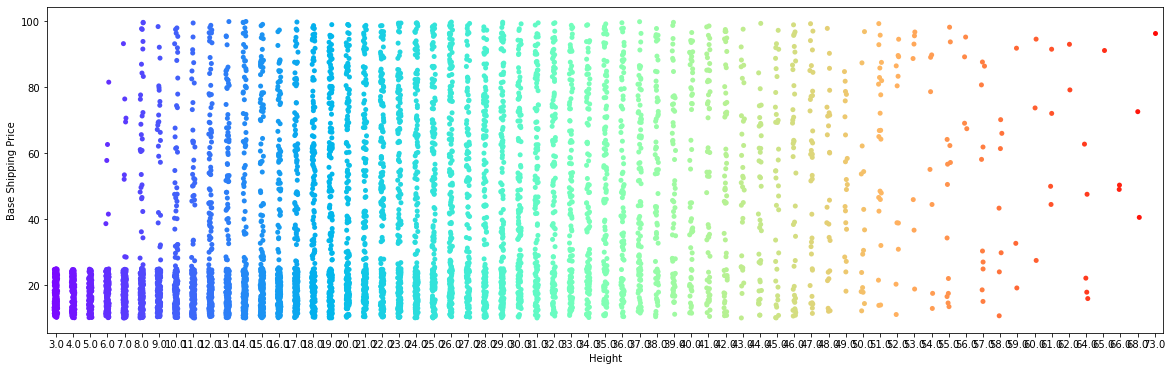

In [14]:
# strip plot between Height and Base Shipping Price columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Height', y='Base Shipping Price', data=train_data,palette='rainbow')

from above strip plot:

1. Maximum of the distribution of Base Shipping Price with repect to Height is between 0 to 30.
2. remaining values are between 30 and 100.

<AxesSubplot:xlabel='Height', ylabel='Cost'>

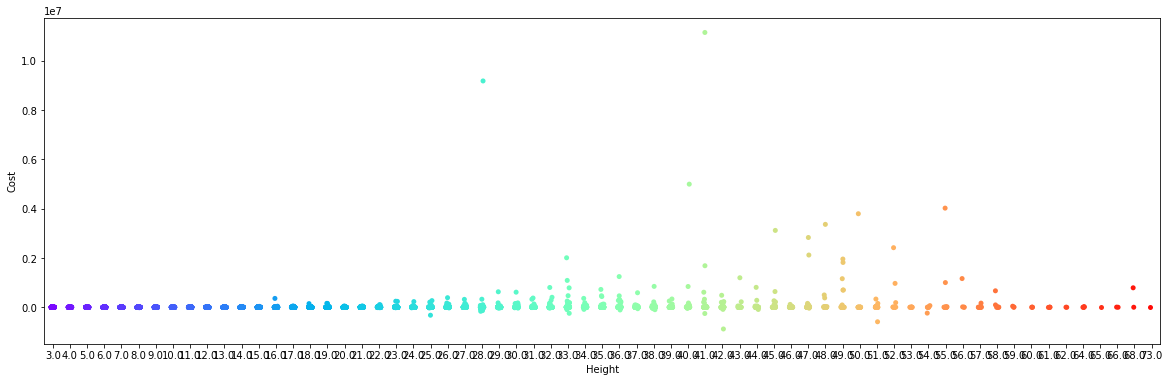

In [15]:
# strip plot between Height and Cost columns
plt.figure(figsize=(20,6))
sns.stripplot(x='Height', y='Cost', data=train_data,palette='rainbow')

from above strip plot:

1. Most of the distribution of Cost with repect to Height are between 0 and 0.1.
2. very few values are above 0.1.

# Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


<AxesSubplot:xlabel='Artist Reputation', ylabel='Height'>

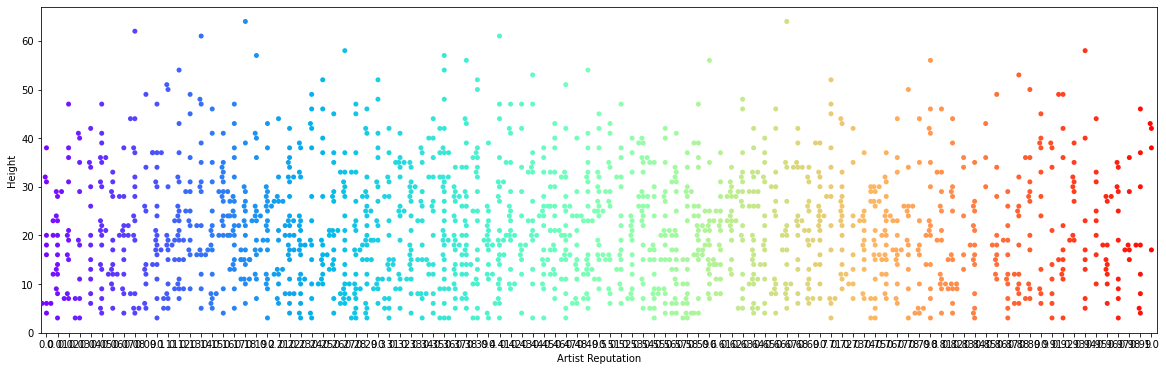

In [16]:
# swarm plot for Artist Reputation and Height columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Height', data=train_data[:2000], palette='rainbow')

from above swarm plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

<AxesSubplot:xlabel='Artist Reputation', ylabel='Height'>

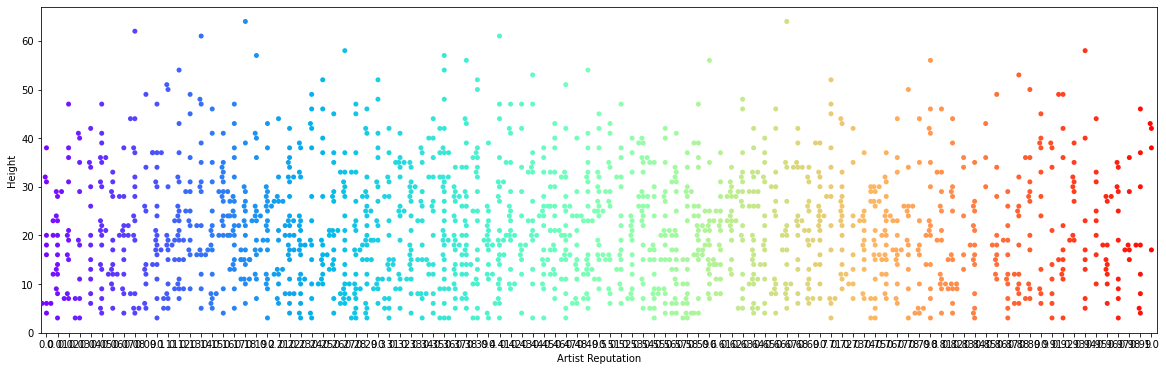

In [17]:
# swarm plot for Artist Reputation and Height columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Height', data=train_data[:2000], palette='rainbow')

from above swarm plot:

1. Most of the distribution of Height with repect to Artist Reputation is between 0 to 50.
2. few values are above 50

<AxesSubplot:xlabel='Artist Reputation', ylabel='Width'>

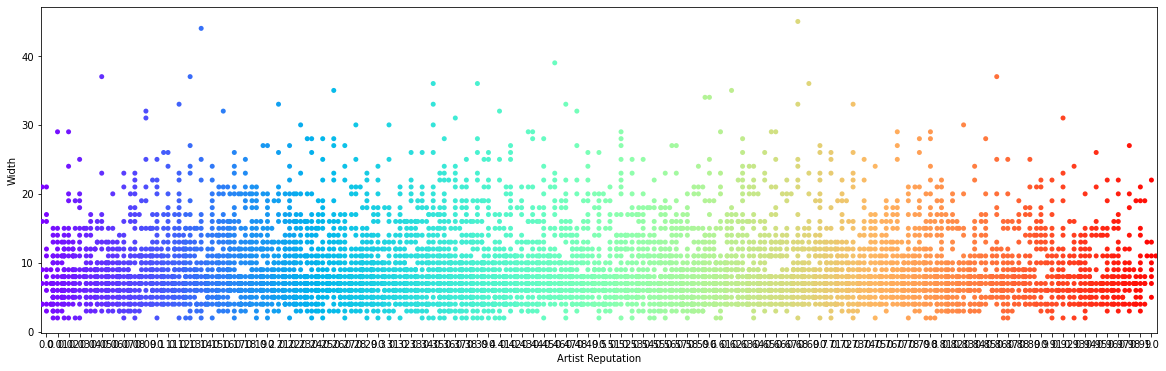

In [18]:
# swarm plot for Artist Reputation and Width columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Width', data=train_data, palette='rainbow')

from above swarm plot:

1. Most of the distribution of Width with repect to Artist Reputation is between 0 to 30.
2. few values are above 30

<AxesSubplot:xlabel='Artist Reputation', ylabel='Weight'>

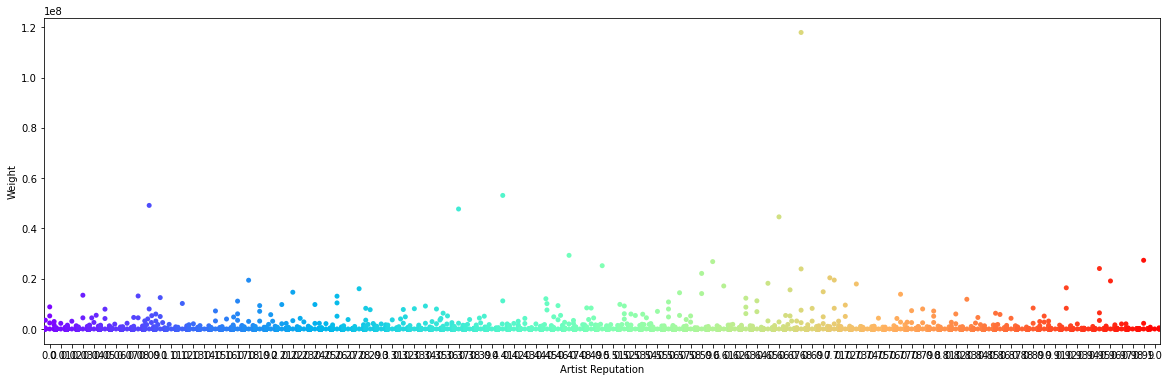

In [19]:
# swarm plot for Artist Reputation and Weight columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Weight', data=train_data, palette='rainbow')

from above swarm plot:

1. Most of the distribution of Weight with repect to Artist Reputation are between 0 and 0.1.
2. few values are above 0.1.

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

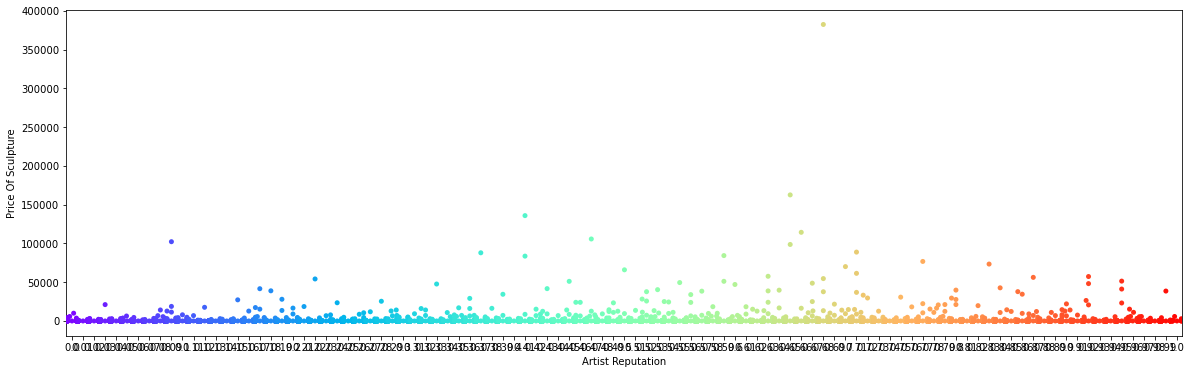

In [20]:
# swarm plot for Artist Reputation and Price Of Sculpture columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Price Of Sculpture', data=train_data, palette='rainbow')

from above swarm plot:

1. Most of the distribution of Price of Sculpture with repect to Artist Reputation is between 0 to 1000.
2. few values are above 1000

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

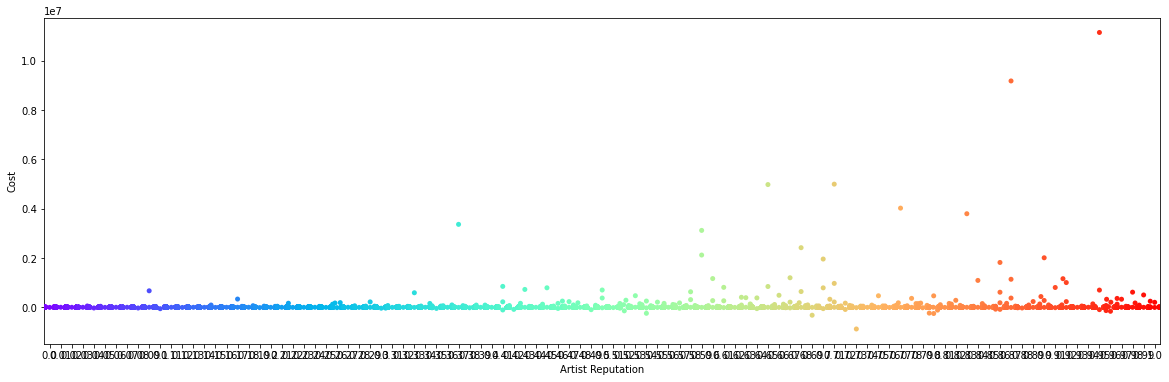

In [21]:
# swarm plot for Artist Reputation and Cost columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='Artist Reputation', y='Cost', data=train_data, palette='rainbow')

from above swarm plot:

1. Most of the distribution of Cost with repect to Artist Reputation are around 0
2. few values area bove 0

# Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

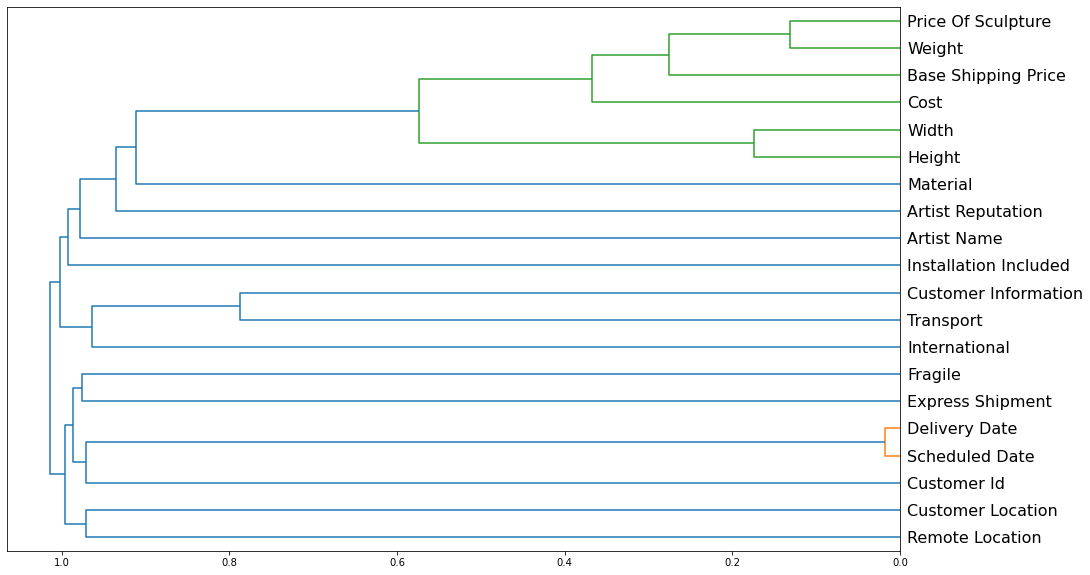

In [22]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = train_data.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

observation from dendrogram:

Price Of Scuplture , Weight, Base Shipping Price, Cost , Width Height are all correlated.

Cost depends on Price Of Scuplture , Weight, Base Shipping Price.

# What we learn after plotting the dataset
1. Data is very skewed in nature except for `Artist Reputation`  
1. There are also outliers in most of the columns  
1. We need to make the distribution of all the columns normal in nature 

In [23]:
# Calculating the mean and median of the columns 
Artist_Reputation_mean = train_data['Artist Reputation'].mean()
Height_mean = train_data['Height'].mean()
Width_mean = train_data['Width'].mean()
Weight_median = train_data['Weight'].mean()

# Why missing values has to handled properly?

* Having missing values in your data is not necessarily a setback.  
* Still, it is an opportunity to perform the right feature engineering to guide the model to interpret the missing information the right way.  
* There are machine learning algorithms and packages that can automatically detect and deal with missing data.  
* However, it’s still recommended to transform the missing data manually through analysis and coding strategy.   
* Even in a well-designed and controlled study, missing data occurs in almost all research. Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.

In [24]:
float_var_list = ['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price']

Artist_Reputation_mean = train_data['Artist Reputation'].mean()
Height_mean = train_data['Height'].mean()
Width_mean = train_data['Width'].mean()
Weight_median = train_data['Weight'].mean()

train_data_copy = train_data.copy(deep=True)
train_data_copy['State_code'] = train_data_copy['Customer Location'].str.split(',', expand=True)[1].str.slice(0, 3)


def create_dummies_columns(df, column_name, prefix_str):
    temp_df  =  pd.get_dummies(df[column_name], prefix=prefix_str, drop_first=True)
    df.drop([column_name],  axis = 1, inplace=True)
    df = pd.concat([df, temp_df], axis = 1)
    return df

def prepare_data(df):
    df.drop(['Customer Id', 'Artist Name'], axis = 1, inplace=True)
    df['Artist Reputation_NA'] = np.where(df['Artist Reputation'].isnull(), 1, 0)
    df['Artist Reputation'].fillna(Artist_Reputation_mean, inplace = True)
    
    df['Transport_NA'] = np.where(df['Transport'].isnull(), 1, 0)
    df['Transport'].fillna(df['Transport'].mode()[0], inplace = True)
    
    df['Remote_Location_NA'] = np.where(df['Remote Location'].isnull(), 1, 0)
    df['Remote Location'].fillna(df['Remote Location'].mode()[0], inplace = True)
    
    df['Height_NA'] = np.where(df['Height'].isnull(), 1, 0)
    df['Height'].fillna(Height_mean, inplace = True)
    df['Height'] = np.exp(df['Height'])
    
    
    df['Width_NA'] = np.where(df['Width'].isnull(), 1, 0)
    df['Width'].fillna(Width_mean, inplace = True)
    df['Width'] = np.log(df['Width'])
    
    df['Weight_NA'] = np.where(df['Weight'].isnull(),1,0)
    df['Weight'].fillna(Weight_median, inplace = True)
    df['Weight'] = np.log(df['Weight'])
    
    df['Material_NA'] = np.where(df['Material'].isnull(), 1, 0)
    df['Material'].fillna('NA', inplace = True)
    #Below code is to fill Random in Material
    #random_sample_Material = df_train_copy['Material'].dropna().sample(df['Material'].isnull().sum(),
    #                                                                   random_state=
    #                                                                   np.log(np.abs(df_train_copy['Cost'])).astype(int))
    
    #random_sample_Material.index = df[df['Material'].isnull()].index
    #df.loc[df['Material'].isnull(), 'Material'] = random_sample_Material
    
    df['Price Of Sculpture'] = np.log(df['Price Of Sculpture'])

    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%m/%d/%y')
    df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'], format='%m/%d/%y')
    df['del_date_sch_date_diff'] = (df['Delivery Date'] - df['Scheduled Date']).dt.days
    df['del_date_sch_date_diff'] = np.abs(df['del_date_sch_date_diff'])
    
    df.drop(['Delivery Date', 'Scheduled Date'], axis = 1, inplace=True)
    
    df['city'] = df['Customer Location'].str.split(',', expand=True)[0]
    df['State_code'] = df['Customer Location'].str.split(',', expand=True)[1].str.slice(0, 3)
    df['pin'] = df['Customer Location'].str.split(',', expand=True)[1].str.split(' ', expand=True)[2]
    
    city_others = df[df['State_code'].isna()]['Customer Location'].str.split(' ', expand=True)[0]
    city_others.index = df[df['State_code'].isnull()].index
    
    State_code_others = df[df['State_code'].isna()]['Customer Location'].str.split(' ', expand=True)[1]
    State_code_others.index = df[df['State_code'].isnull()].index
    
    pin_others = df[df['pin'].isna()]['Customer Location'].str.split(' ', expand=True)[2]
    pin_others.index = df[df['pin'].isnull()].index
    
    
    df.loc[df['State_code'].isnull(), 'city'] = city_others
    df.loc[df['State_code'].isnull(), 'State_code'] = State_code_others
    df.loc[df['pin'].isnull(), 'pin'] = pin_others
    
    #df['pin'] = df['pin'].astype(int)
    
    df.drop(['Customer Location'], axis = 1, inplace=True)
    df.drop(['city', 'pin'], axis = 1, inplace=True)    
    return df


In [25]:
train_data = prepare_data(train_data)

In [26]:
train_data.head(3)

Artist Reputation        Height     Width    Weight Material  \
0               0.26  2.415495e+07  1.791759  8.325548    Brass   
1               0.28  2.008554e+01  1.098612  4.110874    Brass   
2               0.07  2.980958e+03  1.609438  5.468060     Clay   

   Price Of Sculpture  Base Shipping Price International Express Shipment  \
0            2.632608                16.27           Yes              Yes   
1            1.921325                15.00            No               No   
2            1.601406                21.18            No               No   

  Installation Included Transport Fragile Customer Information  \
0                    No   Airways      No        Working Class   
1                    No  Roadways      No        Working Class   
2                    No  Roadways     Yes        Working Class   

  Remote Location    Cost  Artist Reputation_NA  Transport_NA  \
0              No -283.29                     0             0   
1              No -159.96                     0             0   
2             Yes -154.29                     0             0   

   Remote_Location_NA  Height_NA  Width_NA  Weight_NA  Material_NA  \
0                   0          0         0          0            0   
1                   0          0         0          0            0   
2                   0          0         0          0            0   

   del_date_sch_date_diff State_code  
0                       4         OH  
1                       1         WY  
2                       1         WA

In [27]:
#Let's see train data columns
train_data.columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price Of Sculpture', 'Base Shipping Price', 'International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information', 'Remote Location', 'Cost',
       'Artist Reputation_NA', 'Transport_NA', 'Remote_Location_NA',
       'Height_NA', 'Width_NA', 'Weight_NA', 'Material_NA',
       'del_date_sch_date_diff', 'State_code'],
      dtype='object')

# For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

In [28]:
#divide the data into x and y
X=train_data.drop(['Cost'],axis=1)
y = np.log(np.abs(train_data['Cost']))

from feature_engine.encoding import OrdinalEncoder
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    #encoding_method='ordered',
    encoding_method='arbitrary',
    variables=['Material', 'State_code'])
#ordinal_enc.fit(df_train_X, df_train_y)
ordinal_enc.fit(X)
X = ordinal_enc.transform(X)

from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(top_categories=None) 
ohe_enc.fit(X)
X = ohe_enc.transform(X)

### Splitting the data into train and test set

In [29]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split


# train test split with 80% train data and 20% test data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=42)

# Building the machine learning model on the processed dataset

## Linear Regression

In [30]:
# importing necessary libraries for getting metric of model
import math
import sklearn.metrics as metrics
#import the mean_squred_error 
from sklearn.metrics import median_absolute_error,mean_squared_error
#import the linearregression algorithm to check the market_price
from sklearn.linear_model import LinearRegression
#intialize the model
model=LinearRegression()
#fit the linear model to the trainingdata
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The linear regression model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the linear regression model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the linear regression model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for linear regression model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for linear regression model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The linear regression model test socre is  -0.03
the linear regression model train score is 0.01
The rmse score for the linear regression model is 1.6347801830537563
The median_absolute_error test score for linear regression model is 105.66
The metrics.mean_absolute_error test score for linear regression model is 121.89


# Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [31]:
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
model=RandomForestRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The RandomForrestRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the RandomForrestRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the RandomForrestRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for RandomForrestRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for RandomForrestRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The RandomForrestRegressor model test socre is  95.36
the RandomForrestRegressor model train score is 99.43
The rmse score for the RandomForrestRegressor model is 0.35192417249169006
The median_absolute_error test score for RandomForrestRegressor model is 13.04
The metrics.mean_absolute_error test score for RandomForrestRegressor model is 21.20


# Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [32]:
# Fit a Gradient Boosting Regressor model to the train dataset
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42
                                ,loss='ls', min_samples_split=5
                               )
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The GradientBoostingRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the GradientBoostingRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the GradientBoostingRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for GradientBoostingRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for GradientBoostingRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The GradientBoostingRegressor model test socre is  96.28
the GradientBoostingRegressor model train score is 100.00
The rmse score for the GradientBoostingRegressor model is 0.31527384207621156
The median_absolute_error test score for GradientBoostingRegressor model is 10.09
The metrics.mean_absolute_error test score for GradientBoostingRegressor model is 17.95


# DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [33]:
# Fit a Decision Tree Regressor model to the train dataset
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
model=DecisionTreeRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The DecisionTreeRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the DecisionTreeRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the DecisionTreeRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for DecisionTreeRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for DecisionTreeRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The DecisionTreeRegressor model test socre is  90.40
the DecisionTreeRegressor model train score is 100.00
The rmse score for the DecisionTreeRegressor model is 0.5064144489939615
The median_absolute_error test score for DecisionTreeRegressor model is 20.96
The metrics.mean_absolute_error test score for DecisionTreeRegressor model is 31.41


# AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [34]:
# Fit a Decision Tree Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
model=AdaBoostRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The AdaBoostRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the AdaBoostRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the AdaBoostRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for AdaBoostRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for AdaBoostRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The AdaBoostRegressor model test socre is  86.28
the AdaBoostRegressor model train score is 87.90
The rmse score for the AdaBoostRegressor model is 0.6054686545163863
The median_absolute_error test score for AdaBoostRegressor model is 45.08
The metrics.mean_absolute_error test score for AdaBoostRegressor model is 49.04


# XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [35]:
# Fit a Decision Tree Regressor model to the train dataset
# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
model=XGBRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The XGBRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the XGBRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the XGBRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for XGBRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for XGBRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The XGBRegressor model test socre is  96.19
the XGBRegressor model train score is 99.78
The rmse score for the XGBRegressor model is 0.31899664241552217
The median_absolute_error test score for XGBRegressor model is 11.18
The metrics.mean_absolute_error test score for XGBRegressor model is 19.06


# Final result for all the model accuracy scores

In [36]:
#import the linearregression algorithm to check the market_price
from sklearn.linear_model import LinearRegression
#intialize the model
model=LinearRegression()
#fit the linear model to the trainingdata
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The linear regression model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the linear regression model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the linear regression model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for linear regression model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for linear regression model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')
print("\n---------------------------------------------------------------------------------\n")
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
model=RandomForestRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The RandomForrestRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the RandomForrestRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the RandomForrestRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for RandomForrestRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for RandomForrestRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')
print("\n---------------------------------------------------------------------------------\n")
# Fit a Gradient Boosting Regressor model to the train dataset
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42
                                ,loss='ls', min_samples_split=5
                               )
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The GradientBoostingRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the GradientBoostingRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the GradientBoostingRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for GradientBoostingRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for GradientBoostingRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')
print("\n---------------------------------------------------------------------------------\n")
# Fit a Decision Tree Regressor model to the train dataset
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
model=DecisionTreeRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The DecisionTreeRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the DecisionTreeRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the DecisionTreeRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for DecisionTreeRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for DecisionTreeRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')
print("\n---------------------------------------------------------------------------------\n")
# Fit a Decision Tree Regressor model to the train dataset
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
model=AdaBoostRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The AdaBoostRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the AdaBoostRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the AdaBoostRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for AdaBoostRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for AdaBoostRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')
print("\n---------------------------------------------------------------------------------\n")
# Fit a Decision Tree Regressor model to the train dataset
# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
model=XGBRegressor()
# Fit the model to the data
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)
#to calculate the mse score for the dataset
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
#To check the model accuracy_score to the test data
print(f'The XGBRegressor model test socre is  {model.score(X_test,y_test)*100:.2f}')
#To check the model train accuracy_score
print(f'the XGBRegressor model train score is {model.score(X_train,y_train)*100:.2f}')
#Print the rmse socre for the linear regression model
print(f'The rmse score for the XGBRegressor model is {rmse}')
#median_absolute_error test score
print(f'The median_absolute_error test score for XGBRegressor model is {median_absolute_error(y_test,y_pred)*100:.2f}')
#median_absolute_error test score
print(f'The metrics.mean_absolute_error test score for XGBRegressor model is {metrics.mean_absolute_error(y_test,y_pred)*100:.2f}')

The linear regression model test socre is  -0.03
the linear regression model train score is 0.01
The rmse score for the linear regression model is 1.6347801830537563
The median_absolute_error test score for linear regression model is 105.66
The metrics.mean_absolute_error test score for linear regression model is 121.89

---------------------------------------------------------------------------------

The RandomForrestRegressor model test socre is  95.49
the RandomForrestRegressor model train score is 99.40
The rmse score for the RandomForrestRegressor model is 0.34701355286596375
The median_absolute_error test score for RandomForrestRegressor model is 13.09
The metrics.mean_absolute_error test score for RandomForrestRegressor model is 21.13

---------------------------------------------------------------------------------

The GradientBoostingRegressor model test socre is  96.28
the GradientBoostingRegressor model train score is 100.00
The rmse score for the GradientBoostingRegressor

# Finaly we get result

# Conclusion

We did training and prediction using all the above models and selected XGBRegressor Model as final model as it performed well compard to other models with acurracy of 99% on train data and around 96% on test data.

We did training and prediction using all the above models and selected RandomForrestRegressor Model as final model as it performed well compard to other models with acurracy of 99% on train data and around 95% on test data.

We did training and prediction using all the above models and selected GradientBoostingRegressor Model as final model as it performed well compard to other models with acurracy of 100% on train data and around 96% on test data.

According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.